In [29]:
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.cuda.amp import autocast, GradScaler
torch.manual_seed(42)

In [30]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()

        self.dense1 = nn.Linear(784, 500)
        self.dense2 = nn.Linear(500, 500)
        self.dense3 = nn.Linear(500, latent_dim)

    def sample(self, alpha_hat):
        u = torch.rand(size=alpha_hat.size(), requires_grad=True).to(device)
        v = torch.pow(u * alpha_hat * torch.exp(torch.lgamma(alpha_hat)),1.0/alpha_hat)
        z = v / torch.sum(v)
        return z

    def forward(self, x):
        alpha_hat = x.view(-1, 28*28)
        alpha_hat = F.relu(self.dense1(alpha_hat))
        alpha_hat = F.relu(self.dense2(alpha_hat))
        alpha_hat = F.softplus(self.dense3(alpha_hat))
        z = self.sample(alpha_hat)
        return z, alpha_hat

class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.dense1 = nn.Linear(latent_dim, 500)
        self.dense2 = nn.Linear(500, 28*28)

    def forward(self, x):
        x_hat = F.relu(self.dense1(x))
        return self.dense2(x_hat)

In [31]:
class DirVAE(nn.Module):
    def __init__(self, latent_dim):
        super(DirVAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)
    
    def forward(self, x):
        z, alpha_hat = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat, alpha_hat

In [32]:
def ELBO(x_hat, x, alpha_hat, alpha):
    
    likelihood = F.binary_cross_entropy_with_logits(x_hat, x.view(-1, 28*28), reduction='sum')
    
    lgamma_alpha = torch.lgamma(alpha).to(device)
    lgamma_alpha_hat = torch.lgamma(alpha_hat).to(device)
    digamma_alpha_hat = torch.digamma(alpha_hat).to(device)
    
    kld = torch.sum(lgamma_alpha - lgamma_alpha_hat + (alpha_hat - alpha) * digamma_alpha_hat)
    
    if torch.isnan(likelihood):
        print('LIKELIHOOD IS NAN')
        
    if torch.isnan(kld):
        print('KLD IS NAN') 

    return likelihood + kld

loss at end of epoch 0: 20712.59375
test loss at end of epoch 0: 19888.68359375
ORIGINAL


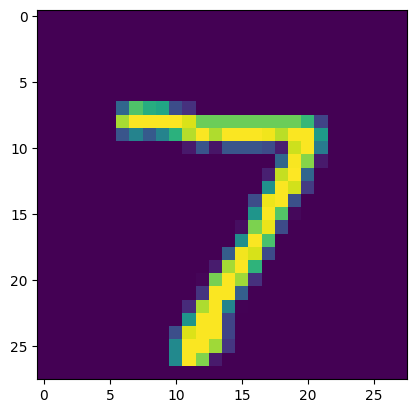

RECONSTRUCTED


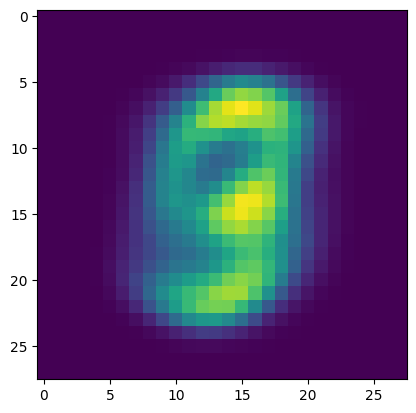

loss at end of epoch 1: 21369.775390625
test loss at end of epoch 1: 20482.451171875
RECONSTRUCTED


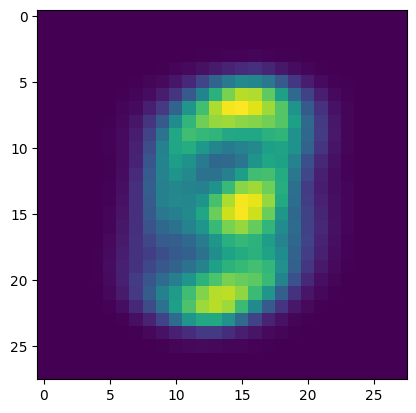

loss at end of epoch 2: 20813.103515625
test loss at end of epoch 2: 19983.314453125
RECONSTRUCTED


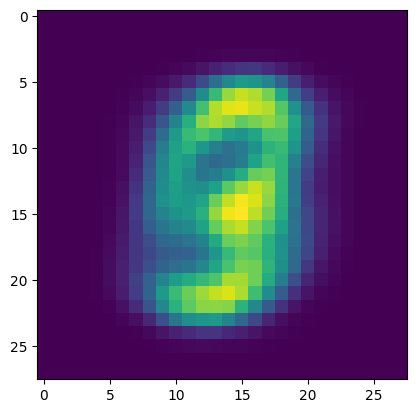

loss at end of epoch 3: 20610.9765625
test loss at end of epoch 3: 20098.361328125
RECONSTRUCTED


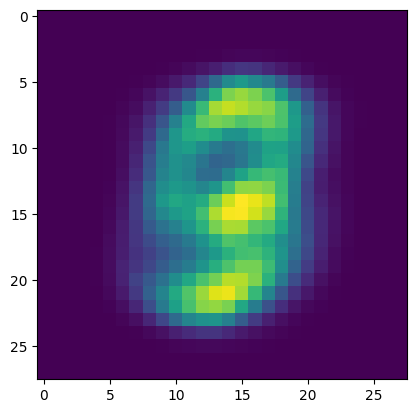

loss at end of epoch 4: 21325.2890625
test loss at end of epoch 4: 20380.474609375
RECONSTRUCTED


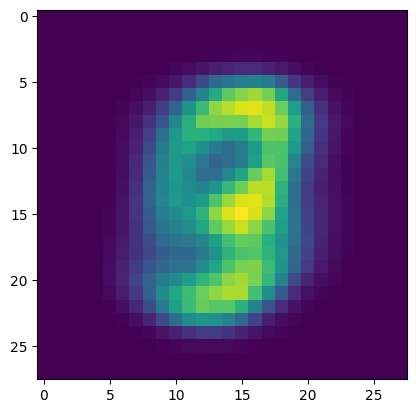

loss at end of epoch 5: 21562.26953125
test loss at end of epoch 5: 20011.513671875
RECONSTRUCTED


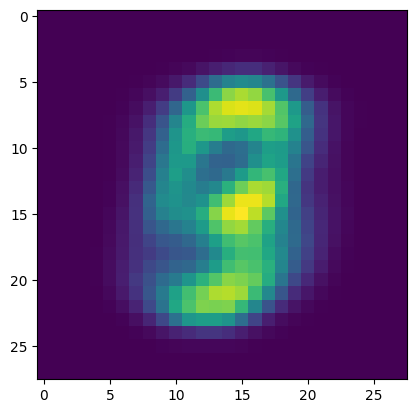

loss at end of epoch 6: 19315.869140625
test loss at end of epoch 6: 21033.748046875
RECONSTRUCTED


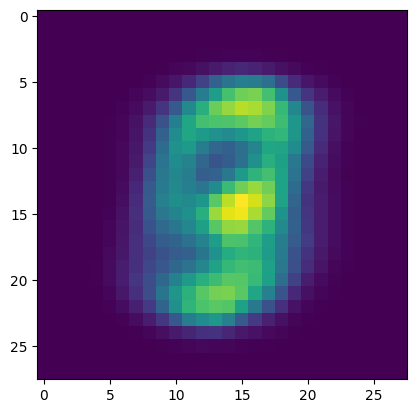

loss at end of epoch 7: 20373.80859375
test loss at end of epoch 7: 20158.630859375
RECONSTRUCTED


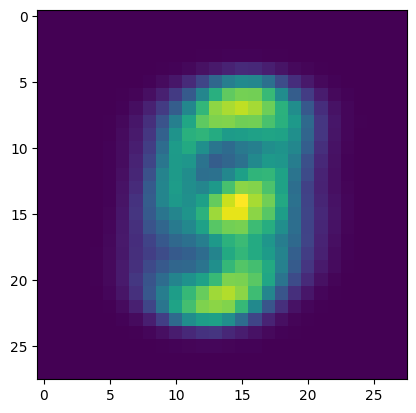

loss at end of epoch 8: 20772.91796875
test loss at end of epoch 8: 20386.11328125
RECONSTRUCTED


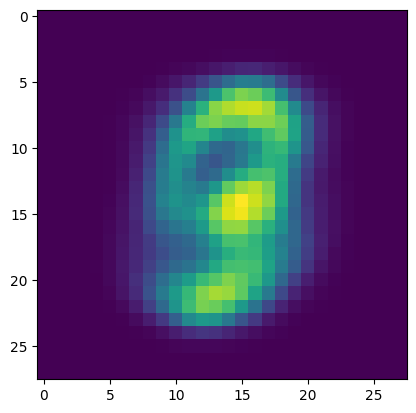

loss at end of epoch 9: 21638.177734375
test loss at end of epoch 9: 19754.083984375
RECONSTRUCTED


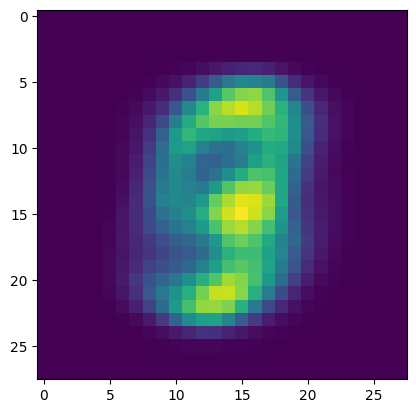

loss at end of epoch 10: 20984.990234375
test loss at end of epoch 10: 20754.59375
RECONSTRUCTED


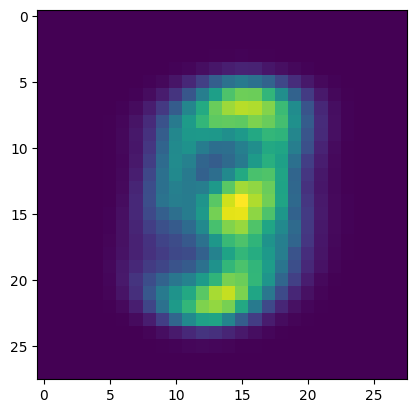

loss at end of epoch 11: 21296.16015625
test loss at end of epoch 11: 21284.5
RECONSTRUCTED


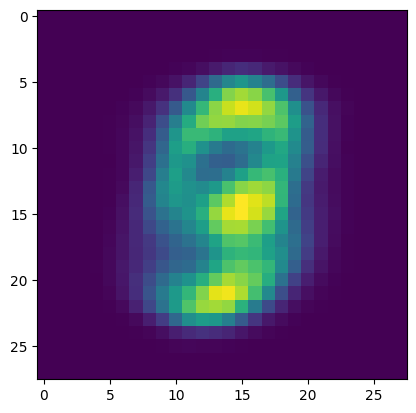

loss at end of epoch 12: 20518.8203125
test loss at end of epoch 12: 20769.783203125
RECONSTRUCTED


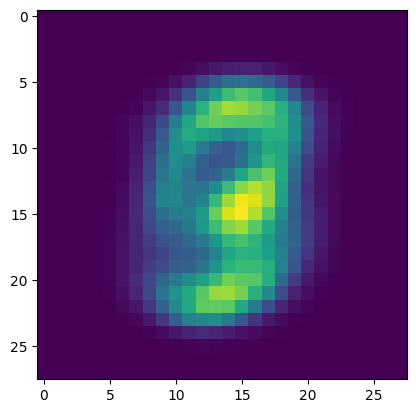

loss at end of epoch 13: 20439.3515625
test loss at end of epoch 13: 19842.869140625
RECONSTRUCTED


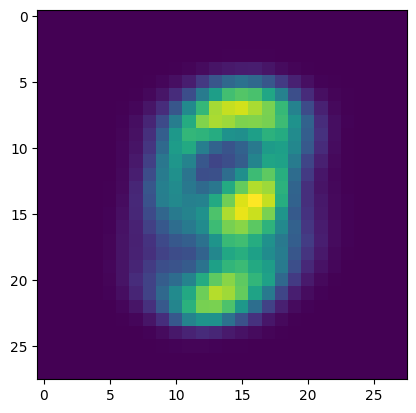

loss at end of epoch 14: 20175.78125
test loss at end of epoch 14: 21433.765625
RECONSTRUCTED


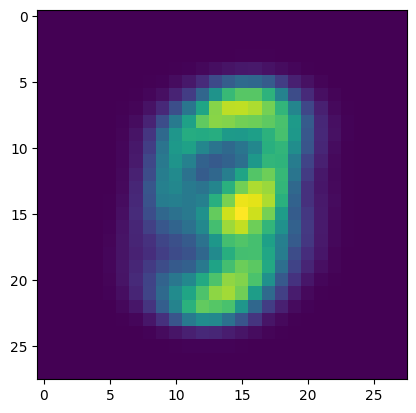

loss at end of epoch 15: 20069.404296875
test loss at end of epoch 15: 20503.041015625
RECONSTRUCTED


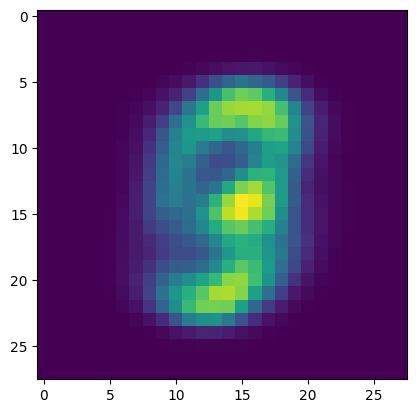

loss at end of epoch 16: 20463.228515625
test loss at end of epoch 16: 20376.35546875
RECONSTRUCTED


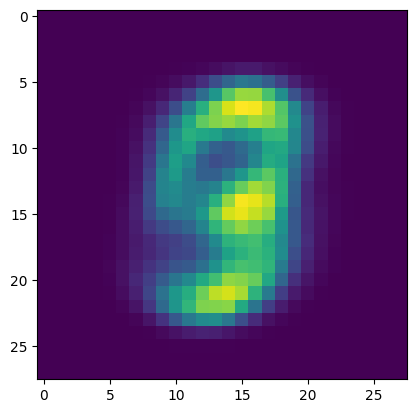

loss at end of epoch 17: 21106.880859375
test loss at end of epoch 17: 19951.94140625
RECONSTRUCTED


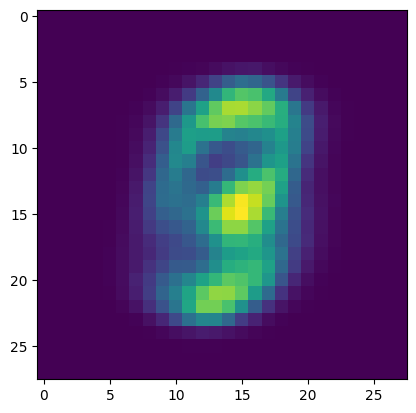

loss at end of epoch 18: 20820.49609375
test loss at end of epoch 18: 20416.00390625
RECONSTRUCTED


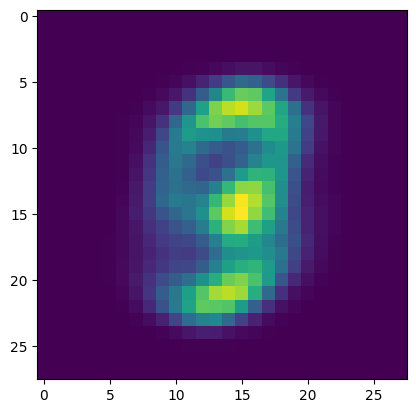

loss at end of epoch 19: 20110.53515625
test loss at end of epoch 19: 20532.4453125
RECONSTRUCTED


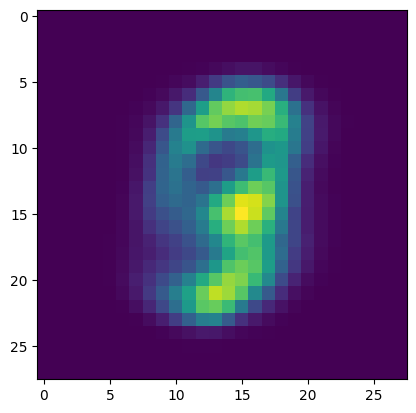

loss at end of epoch 20: 20360.833984375
test loss at end of epoch 20: 20554.87109375
RECONSTRUCTED


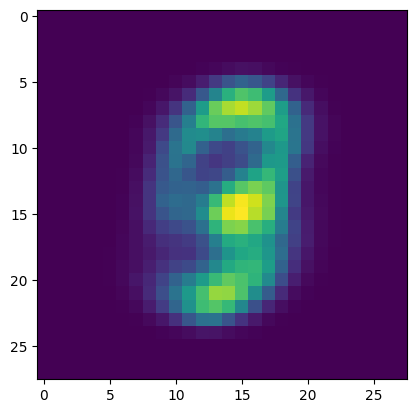

loss at end of epoch 21: 21853.08203125
test loss at end of epoch 21: 20605.265625
RECONSTRUCTED


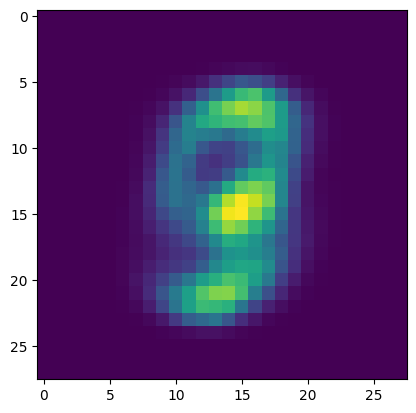

loss at end of epoch 22: 20917.6875
test loss at end of epoch 22: 20723.6015625
RECONSTRUCTED


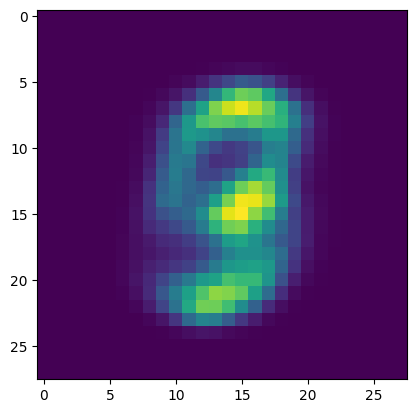

loss at end of epoch 23: 20854.873046875
test loss at end of epoch 23: 20277.107421875
RECONSTRUCTED


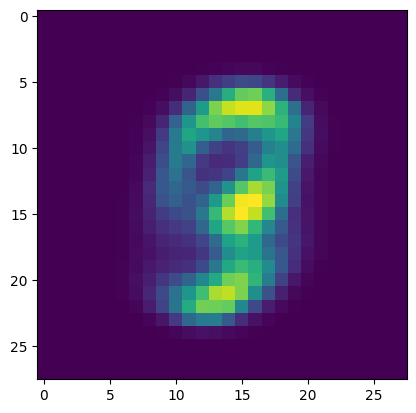

loss at end of epoch 24: 21520.537109375
test loss at end of epoch 24: 20963.28515625
RECONSTRUCTED


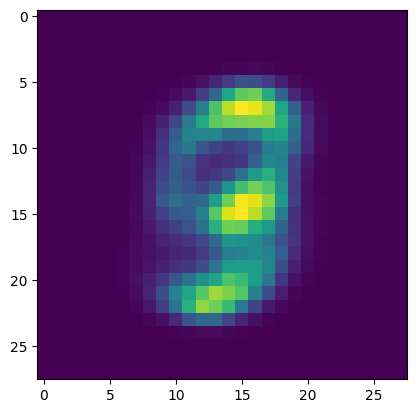

loss at end of epoch 25: 19500.8515625
test loss at end of epoch 25: 20630.34375
RECONSTRUCTED


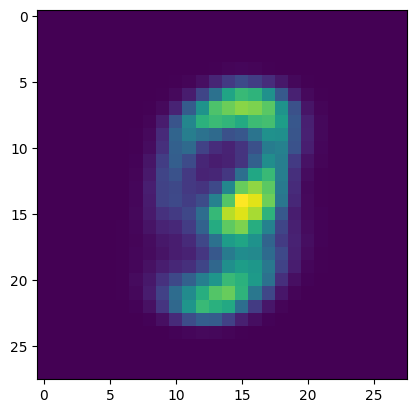

loss at end of epoch 26: 19844.7890625
test loss at end of epoch 26: 21271.171875
RECONSTRUCTED


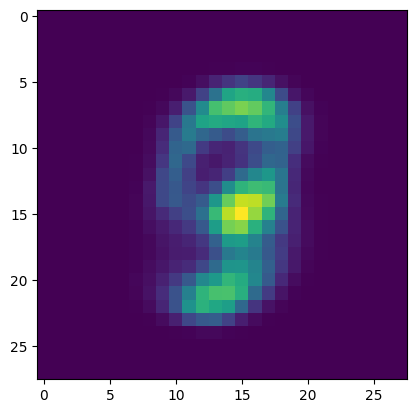

loss at end of epoch 27: 20554.59375
test loss at end of epoch 27: 21209.1015625
RECONSTRUCTED


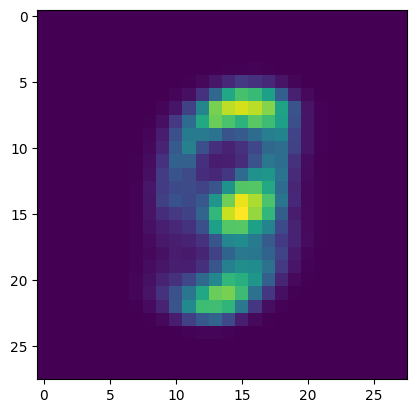

loss at end of epoch 28: 21399.701171875
test loss at end of epoch 28: 20208.037109375
RECONSTRUCTED


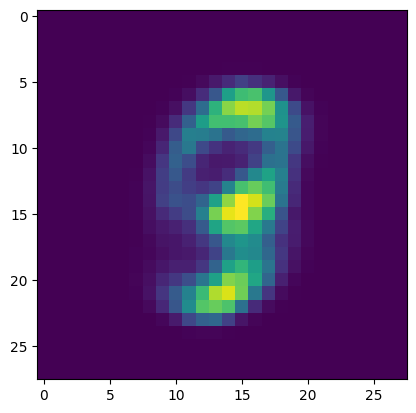

loss at end of epoch 29: 20687.091796875
test loss at end of epoch 29: 20857.513671875
RECONSTRUCTED


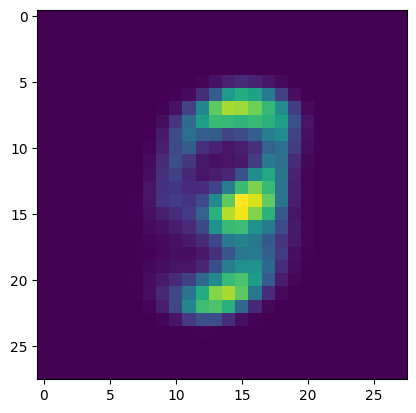

loss at end of epoch 30: 20142.564453125
test loss at end of epoch 30: 20818.37109375
RECONSTRUCTED


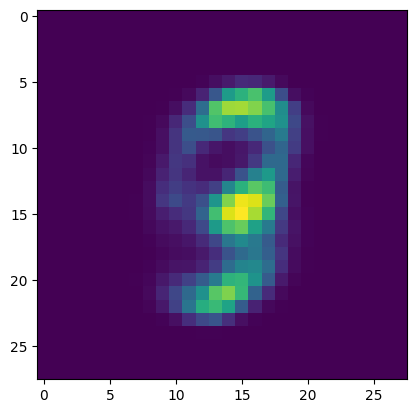

loss at end of epoch 31: 20520.05078125
test loss at end of epoch 31: 21231.9921875
RECONSTRUCTED


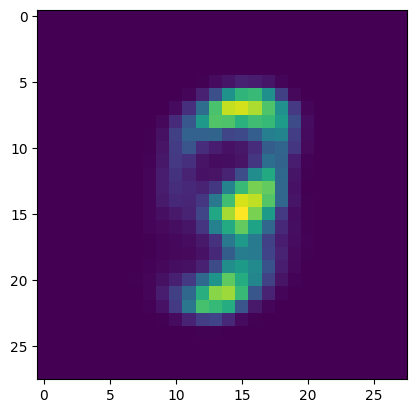

loss at end of epoch 32: 20994.814453125
test loss at end of epoch 32: 20071.974609375
RECONSTRUCTED


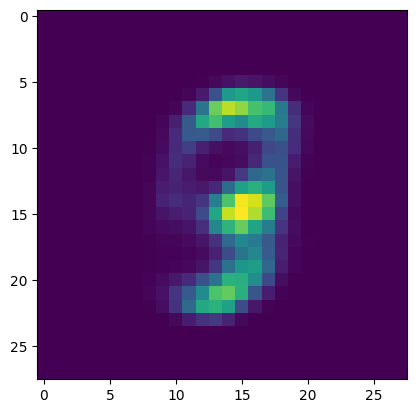

loss at end of epoch 33: 19786.95703125
test loss at end of epoch 33: 21230.580078125
RECONSTRUCTED


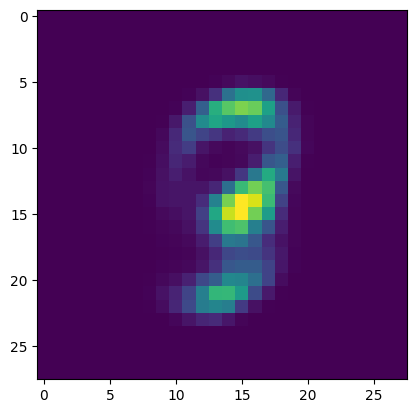

loss at end of epoch 34: 20642.69921875
test loss at end of epoch 34: 21094.935546875
RECONSTRUCTED


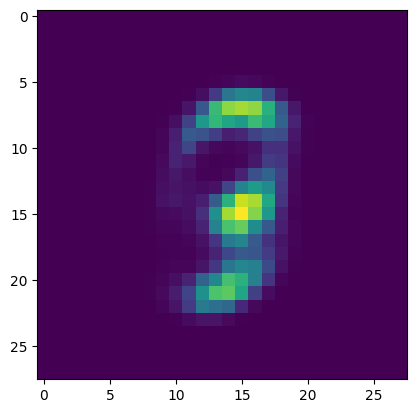

loss at end of epoch 35: 21093.8125
test loss at end of epoch 35: 19759.08203125
RECONSTRUCTED


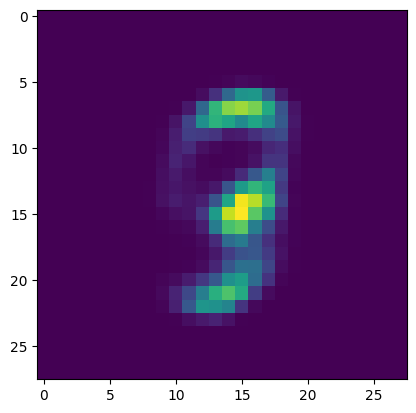

loss at end of epoch 36: 20014.455078125
test loss at end of epoch 36: 20969.8359375
RECONSTRUCTED


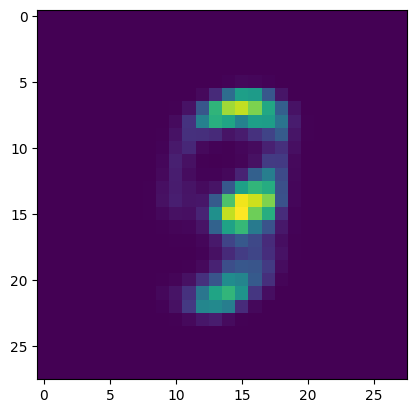

loss at end of epoch 37: 20489.310546875
test loss at end of epoch 37: 20240.287109375
RECONSTRUCTED


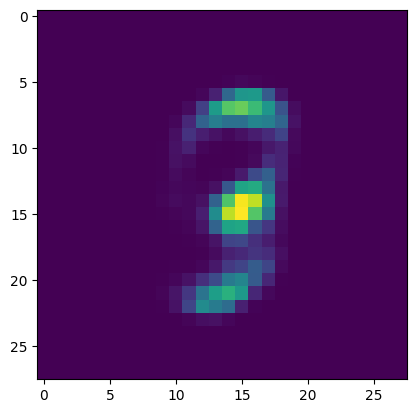

loss at end of epoch 38: 21691.318359375
test loss at end of epoch 38: 20084.662109375
RECONSTRUCTED


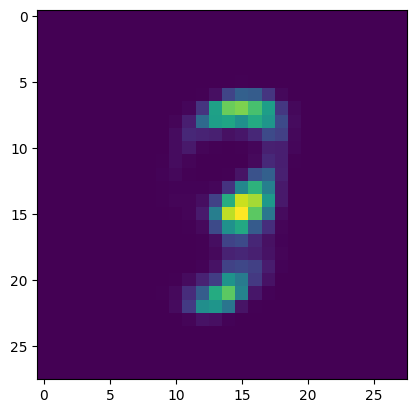

loss at end of epoch 39: 20859.41796875
test loss at end of epoch 39: 20822.5546875
RECONSTRUCTED


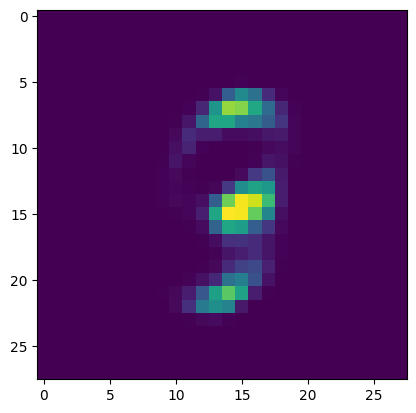

loss at end of epoch 40: 20951.5
test loss at end of epoch 40: 20890.287109375
RECONSTRUCTED


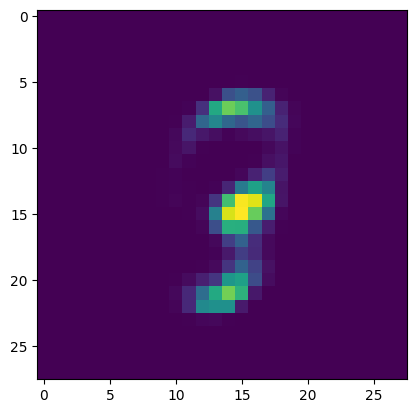

loss at end of epoch 41: 19817.39453125
test loss at end of epoch 41: 20238.935546875
RECONSTRUCTED


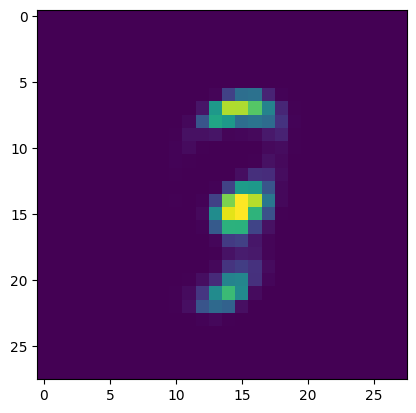

loss at end of epoch 42: 19881.0234375
test loss at end of epoch 42: 21279.82421875
RECONSTRUCTED


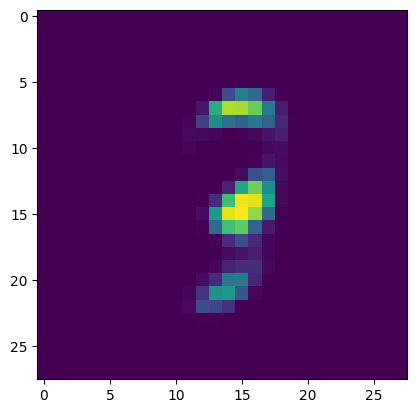

loss at end of epoch 43: 20316.669921875
test loss at end of epoch 43: 20080.44921875
RECONSTRUCTED


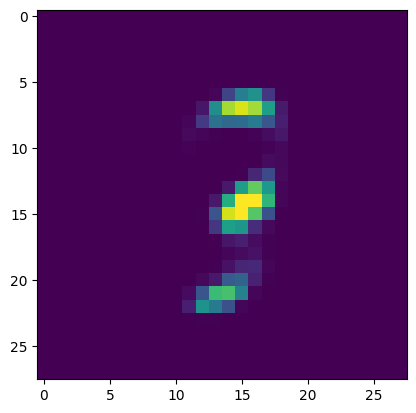

loss at end of epoch 44: 20589.736328125
test loss at end of epoch 44: 19883.91015625
RECONSTRUCTED


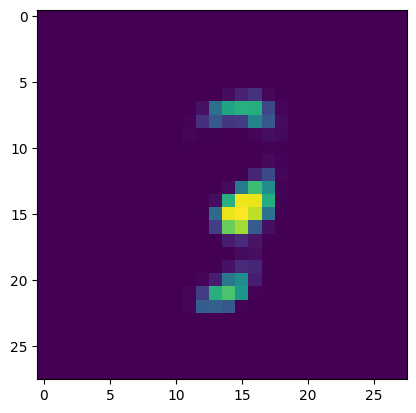

loss at end of epoch 45: 20402.763671875
test loss at end of epoch 45: 20102.837890625
RECONSTRUCTED


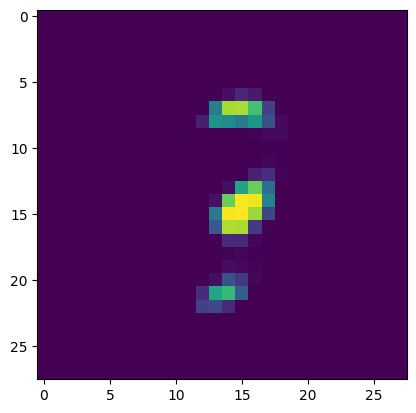

loss at end of epoch 46: 20668.94921875
test loss at end of epoch 46: 19207.3359375
RECONSTRUCTED


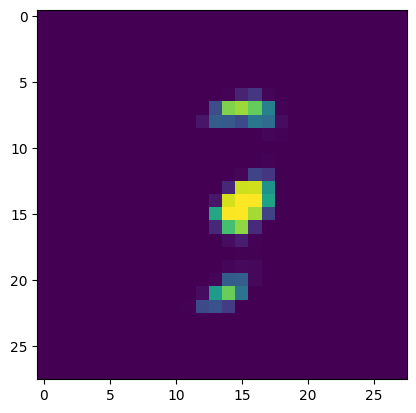

loss at end of epoch 47: 20451.326171875
test loss at end of epoch 47: 20887.91796875
RECONSTRUCTED


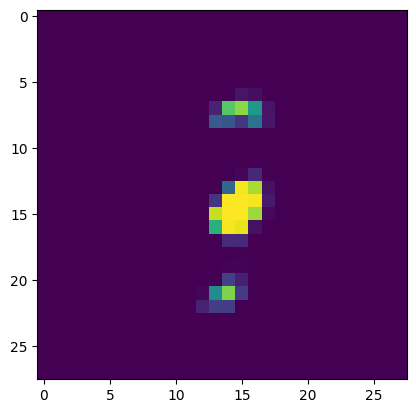

loss at end of epoch 48: 19865.0
test loss at end of epoch 48: 20308.0234375
RECONSTRUCTED


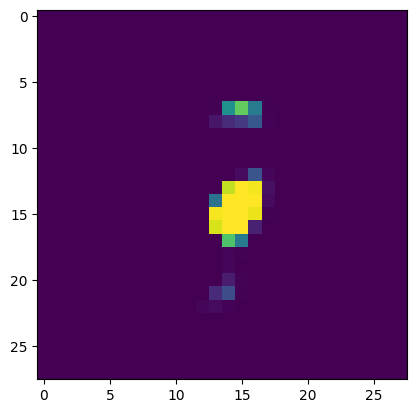

loss at end of epoch 49: 21499.544921875
test loss at end of epoch 49: 19822.484375
RECONSTRUCTED


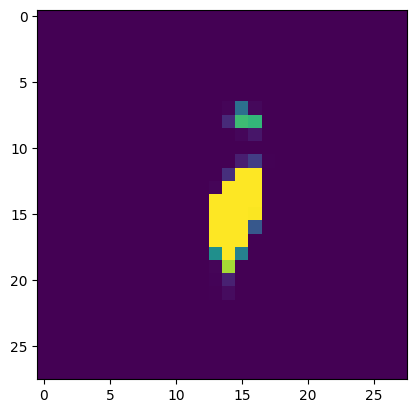

loss at end of epoch 50: 20553.458984375
test loss at end of epoch 50: 20267.322265625
RECONSTRUCTED


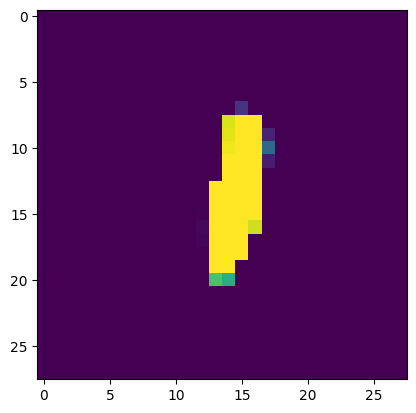

loss at end of epoch 51: 20120.208984375
test loss at end of epoch 51: 19751.615234375
RECONSTRUCTED


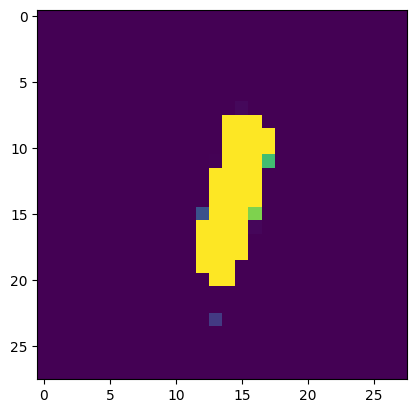

loss at end of epoch 52: 19749.728515625
test loss at end of epoch 52: 19406.310546875
RECONSTRUCTED


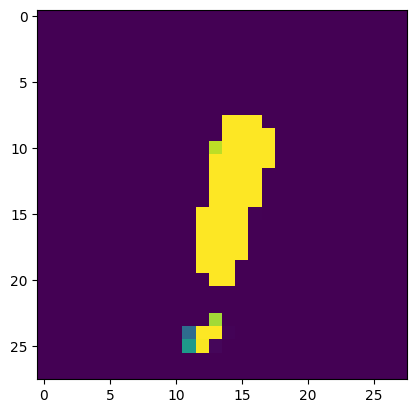

loss at end of epoch 53: 19498.947265625
test loss at end of epoch 53: 19421.033203125
RECONSTRUCTED


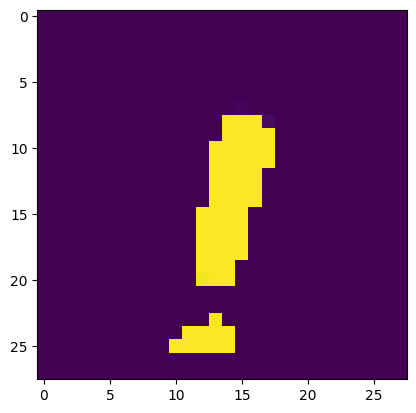

loss at end of epoch 54: 20137.046875
test loss at end of epoch 54: 20041.169921875
RECONSTRUCTED


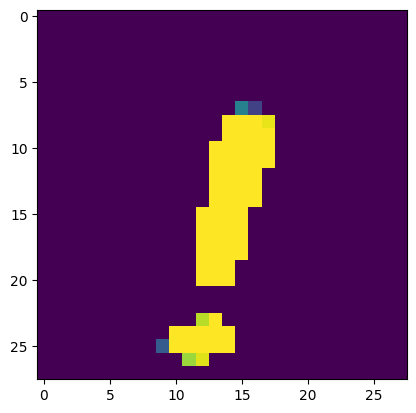

loss at end of epoch 55: 19504.38671875
test loss at end of epoch 55: 20296.56640625
RECONSTRUCTED


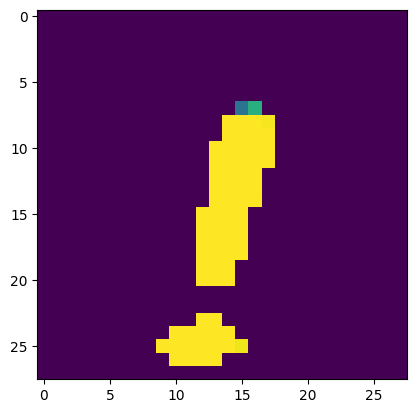

loss at end of epoch 56: 18848.80078125
test loss at end of epoch 56: 19044.041015625
RECONSTRUCTED


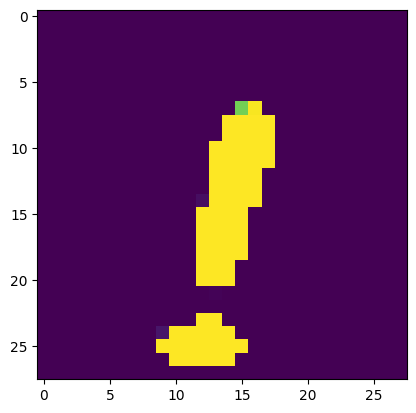

loss at end of epoch 57: 19198.47265625
test loss at end of epoch 57: 19227.990234375
RECONSTRUCTED


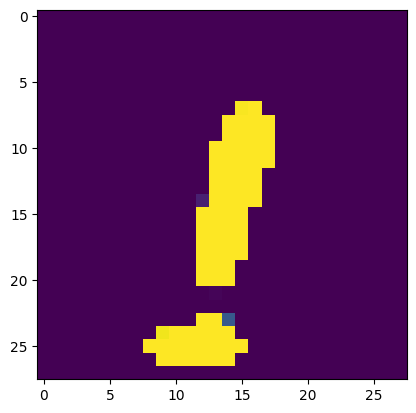

loss at end of epoch 58: 20414.822265625
test loss at end of epoch 58: 19581.69921875
RECONSTRUCTED


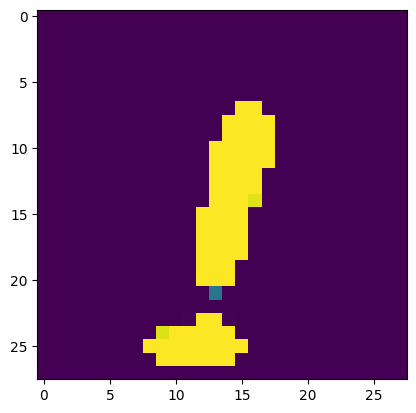

loss at end of epoch 59: 19236.087890625
test loss at end of epoch 59: 19479.03125
RECONSTRUCTED


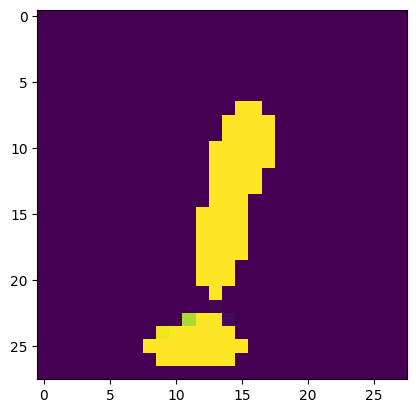

loss at end of epoch 60: 20111.2578125
test loss at end of epoch 60: 19135.4609375
RECONSTRUCTED


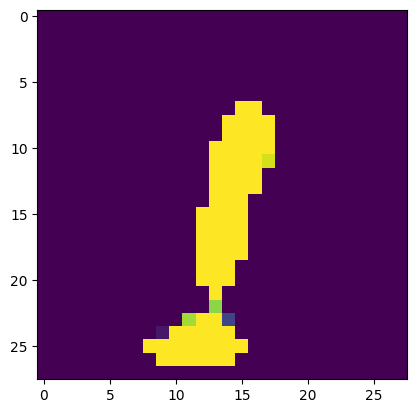

loss at end of epoch 61: 19243.74609375
test loss at end of epoch 61: 19408.998046875
RECONSTRUCTED


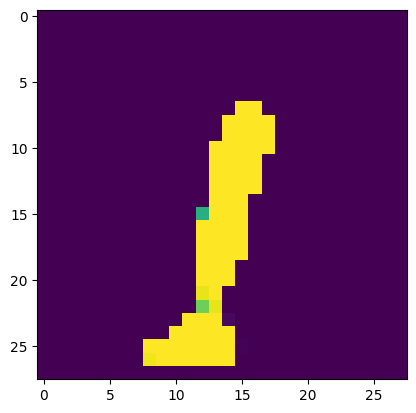

loss at end of epoch 62: 19058.56640625
test loss at end of epoch 62: 19547.8359375
RECONSTRUCTED


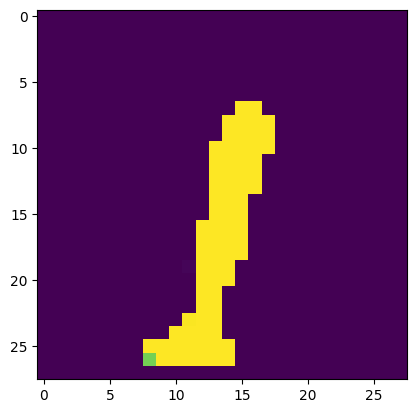

loss at end of epoch 63: 19477.845703125
test loss at end of epoch 63: 19329.353515625
RECONSTRUCTED


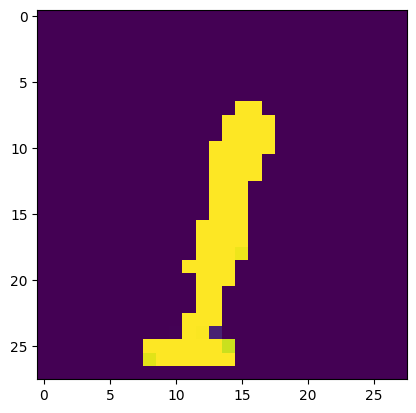

loss at end of epoch 64: 19360.763671875
test loss at end of epoch 64: 19940.89453125
RECONSTRUCTED


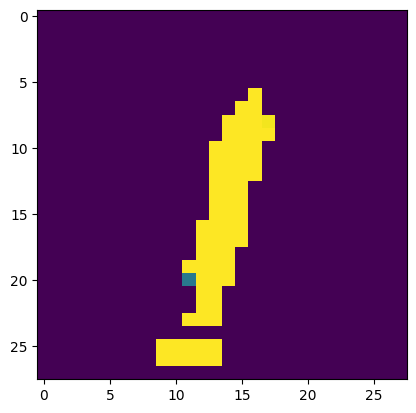

loss at end of epoch 65: 19394.8125
test loss at end of epoch 65: 20222.787109375
RECONSTRUCTED


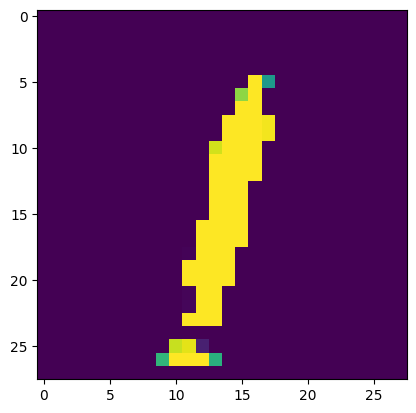

loss at end of epoch 66: 18965.087890625
test loss at end of epoch 66: 19478.787109375
RECONSTRUCTED


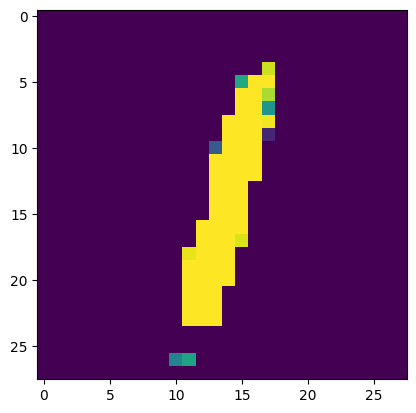

loss at end of epoch 67: 19093.46484375
test loss at end of epoch 67: 19676.201171875
RECONSTRUCTED


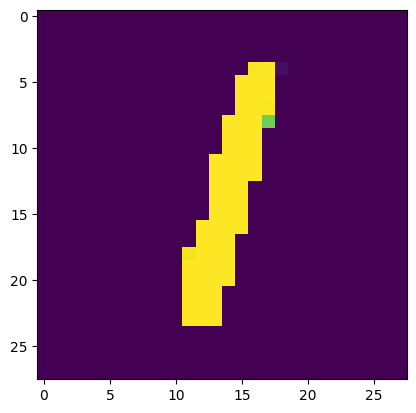

loss at end of epoch 68: 19574.615234375
test loss at end of epoch 68: 19930.603515625
RECONSTRUCTED


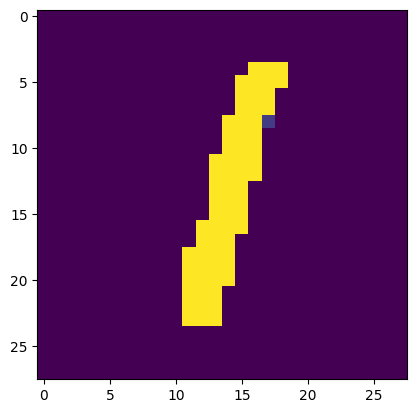

loss at end of epoch 69: 18893.24609375
test loss at end of epoch 69: 19089.443359375
RECONSTRUCTED


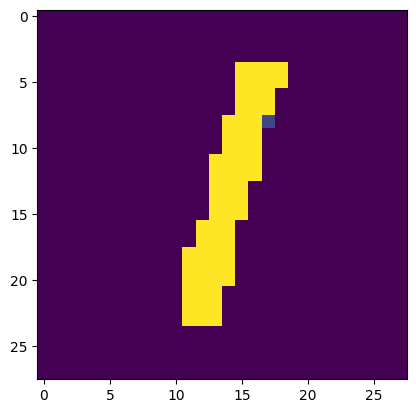

loss at end of epoch 70: 19263.990234375
test loss at end of epoch 70: 19815.16796875
RECONSTRUCTED


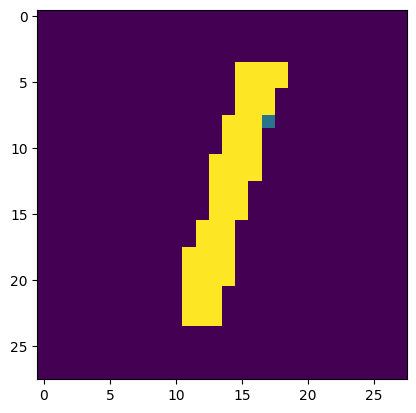

loss at end of epoch 71: 18198.216796875
test loss at end of epoch 71: 18629.9375
RECONSTRUCTED


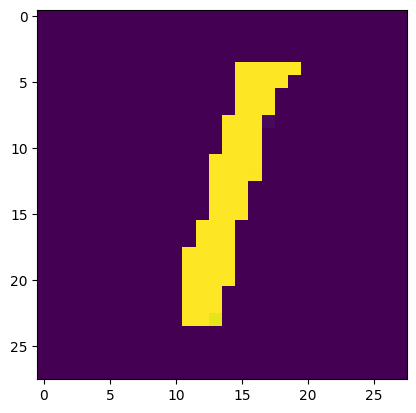

loss at end of epoch 72: 18199.400390625
test loss at end of epoch 72: 19137.85546875
RECONSTRUCTED


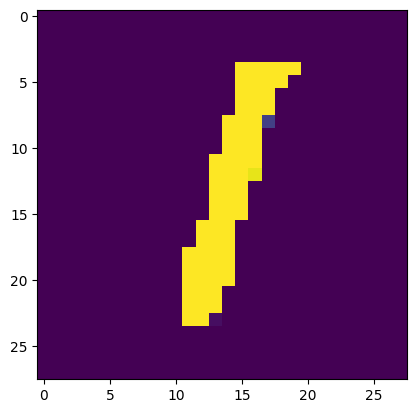

loss at end of epoch 73: 19250.75
test loss at end of epoch 73: 19498.275390625
RECONSTRUCTED


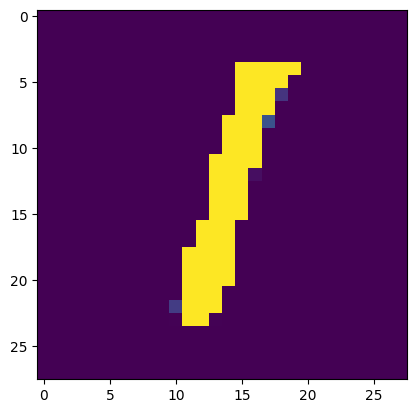

loss at end of epoch 74: 18884.92578125
test loss at end of epoch 74: 19710.7421875
RECONSTRUCTED


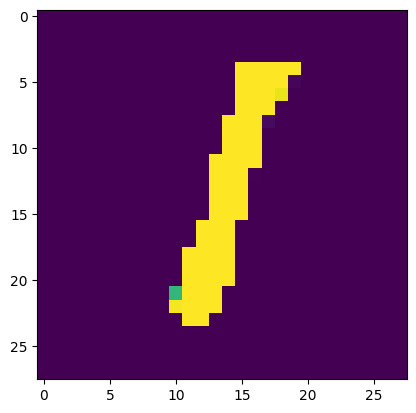

loss at end of epoch 75: 18704.619140625
test loss at end of epoch 75: 18344.3671875
RECONSTRUCTED


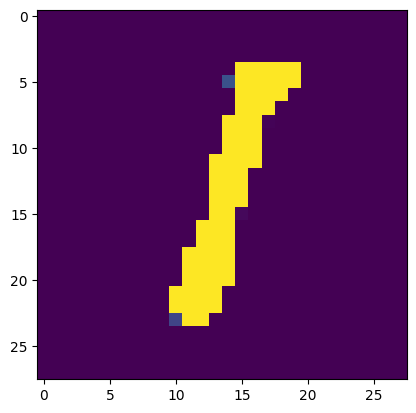

loss at end of epoch 76: 19098.076171875
test loss at end of epoch 76: 19778.46484375
RECONSTRUCTED


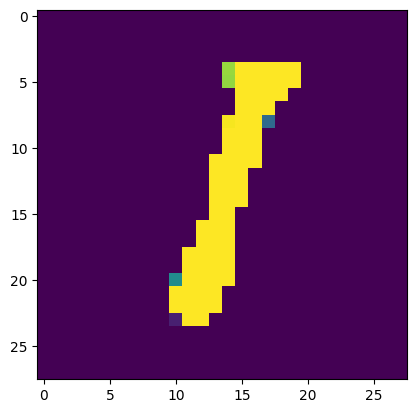

loss at end of epoch 77: 18920.216796875
test loss at end of epoch 77: 19911.794921875
RECONSTRUCTED


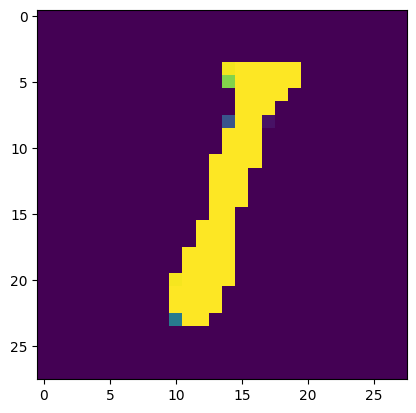

loss at end of epoch 78: 19269.68359375
test loss at end of epoch 78: 19211.69140625
RECONSTRUCTED


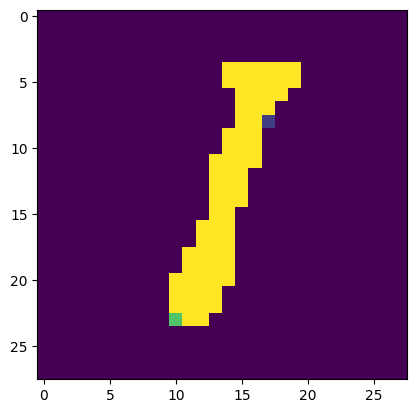

loss at end of epoch 79: 20129.333984375
test loss at end of epoch 79: 18613.716796875
RECONSTRUCTED


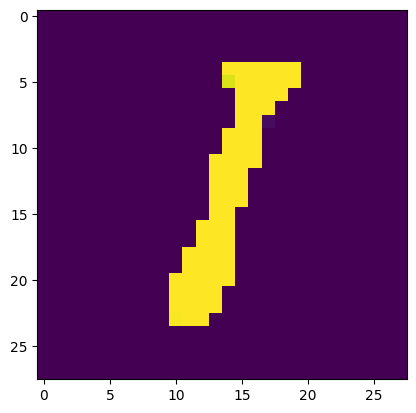

loss at end of epoch 80: 20420.35546875
test loss at end of epoch 80: 19798.67578125
RECONSTRUCTED


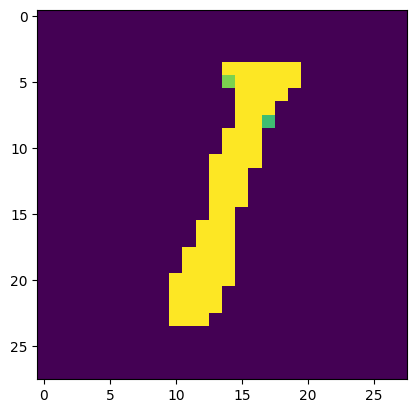

loss at end of epoch 81: 19016.69140625
test loss at end of epoch 81: 19937.2734375
RECONSTRUCTED


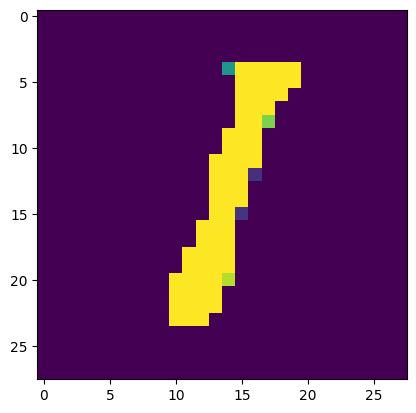

loss at end of epoch 82: 19764.1875
test loss at end of epoch 82: 19393.3359375
RECONSTRUCTED


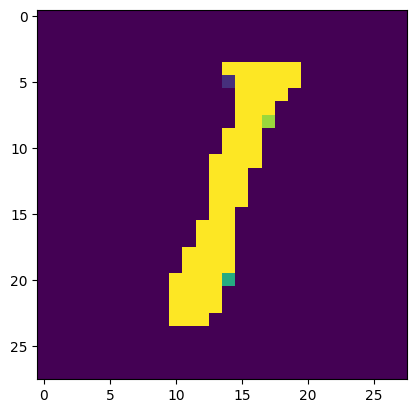

loss at end of epoch 83: 19101.91015625
test loss at end of epoch 83: 18774.380859375
RECONSTRUCTED


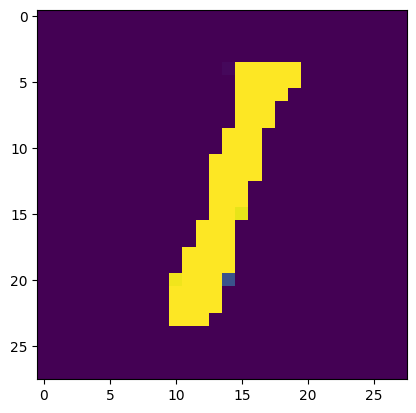

loss at end of epoch 84: 18265.76171875
test loss at end of epoch 84: 19295.6875
RECONSTRUCTED


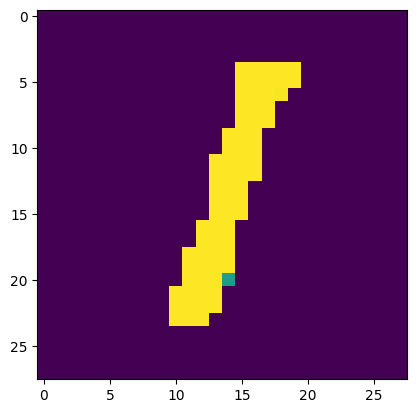

loss at end of epoch 85: 18733.158203125
test loss at end of epoch 85: 19029.986328125
RECONSTRUCTED


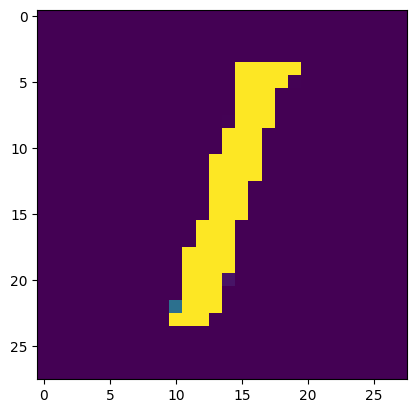

loss at end of epoch 86: 20481.0234375
test loss at end of epoch 86: 18581.51171875
RECONSTRUCTED


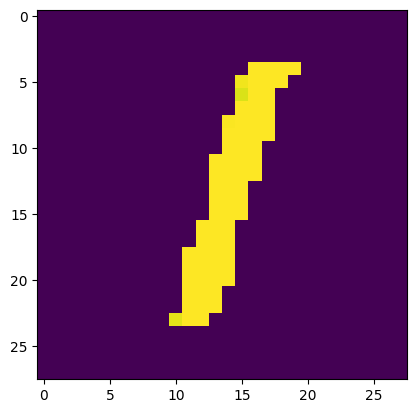

loss at end of epoch 87: 18059.02734375
test loss at end of epoch 87: 19144.91015625
RECONSTRUCTED


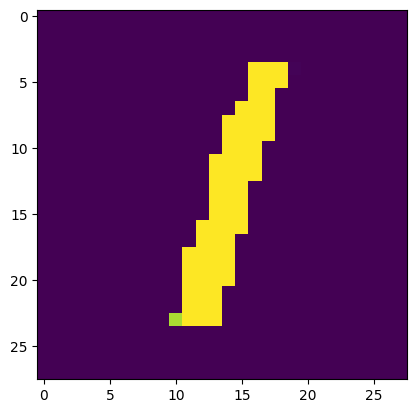

loss at end of epoch 88: 19906.587890625
test loss at end of epoch 88: 18647.1875
RECONSTRUCTED


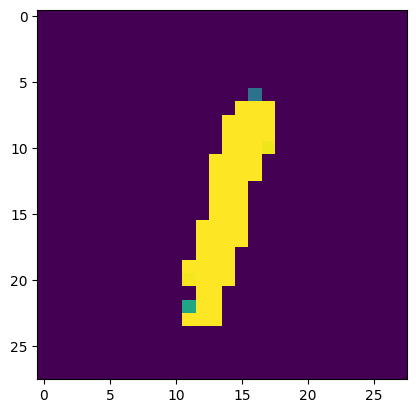

loss at end of epoch 89: 18673.3359375
test loss at end of epoch 89: 18386.828125
RECONSTRUCTED


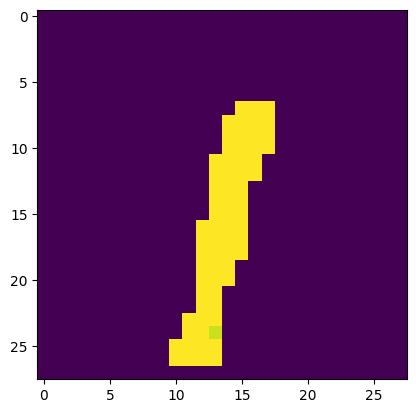

loss at end of epoch 90: 18632.279296875
test loss at end of epoch 90: 19618.349609375
RECONSTRUCTED


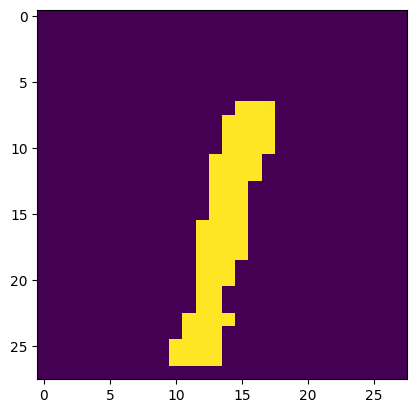

loss at end of epoch 91: 18298.794921875
test loss at end of epoch 91: 18598.955078125
RECONSTRUCTED


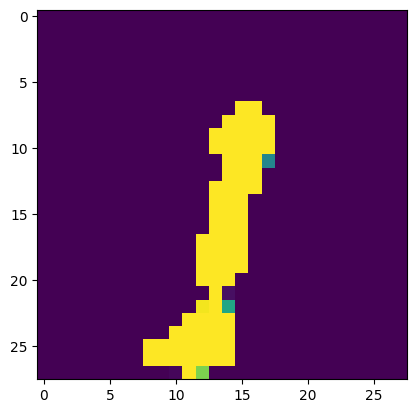

loss at end of epoch 92: 18274.091796875
test loss at end of epoch 92: 18953.490234375
RECONSTRUCTED


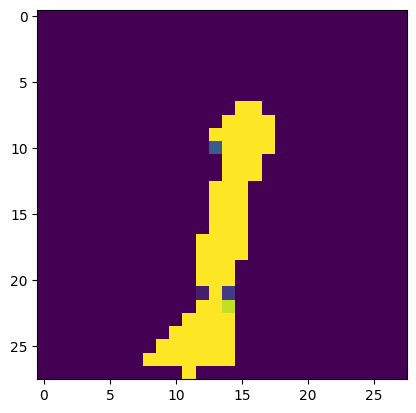

loss at end of epoch 93: 18964.654296875
test loss at end of epoch 93: 19031.10546875
RECONSTRUCTED


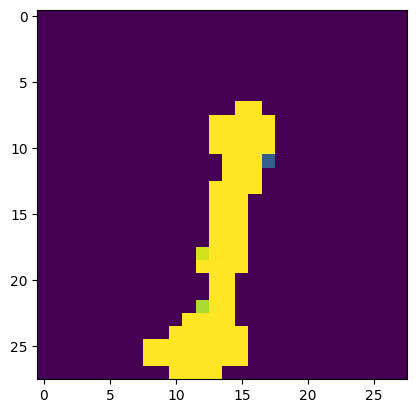

loss at end of epoch 94: 18904.388671875
test loss at end of epoch 94: 17322.94921875
RECONSTRUCTED


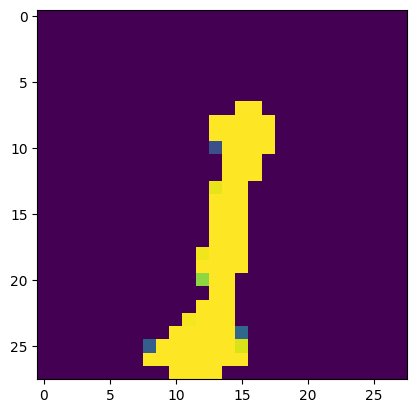

loss at end of epoch 95: 18046.869140625
test loss at end of epoch 95: 19548.078125
RECONSTRUCTED


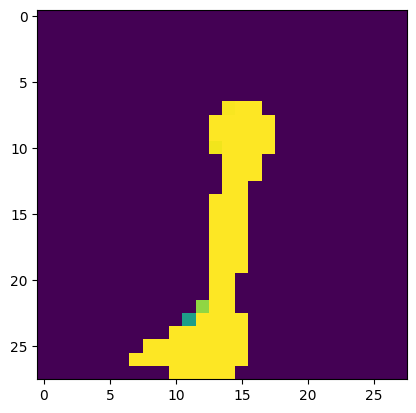

loss at end of epoch 96: 18159.7734375
test loss at end of epoch 96: 18844.732421875
RECONSTRUCTED


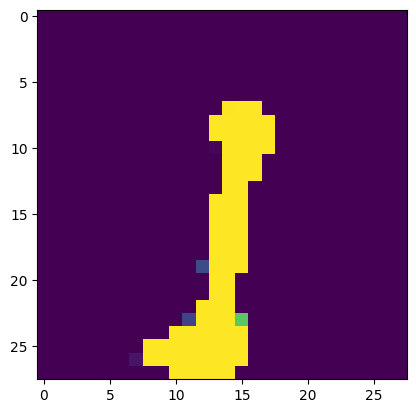

loss at end of epoch 97: 18811.177734375
test loss at end of epoch 97: 18829.1953125
RECONSTRUCTED


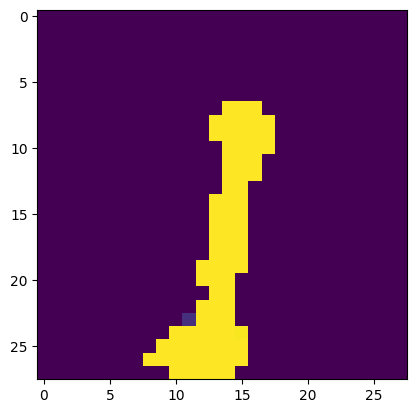

loss at end of epoch 98: 18467.34375
test loss at end of epoch 98: 19053.84375
RECONSTRUCTED


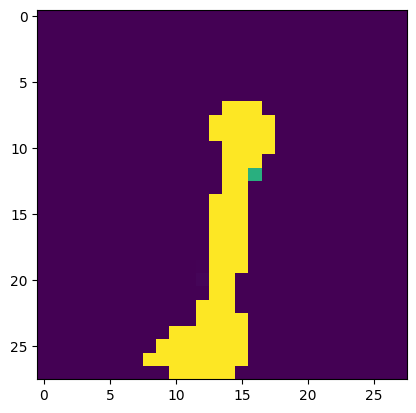

loss at end of epoch 99: 18781.802734375
test loss at end of epoch 99: 18482.802734375
RECONSTRUCTED


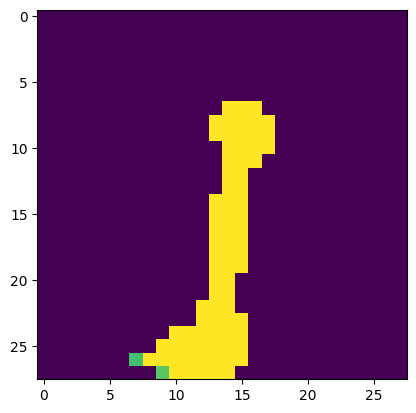

loss at end of epoch 100: 18854.375
test loss at end of epoch 100: 17858.54296875
RECONSTRUCTED


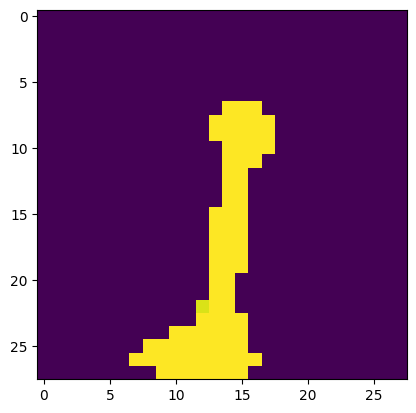

loss at end of epoch 101: 18128.927734375
test loss at end of epoch 101: 18129.986328125
RECONSTRUCTED


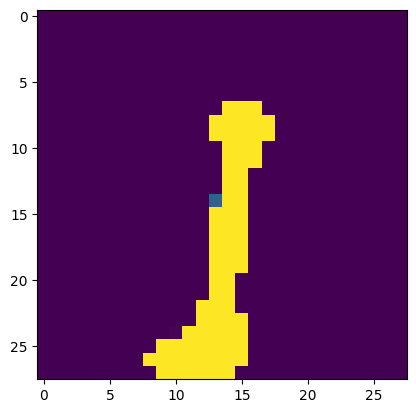

loss at end of epoch 102: 18937.671875
test loss at end of epoch 102: 17713.640625
RECONSTRUCTED


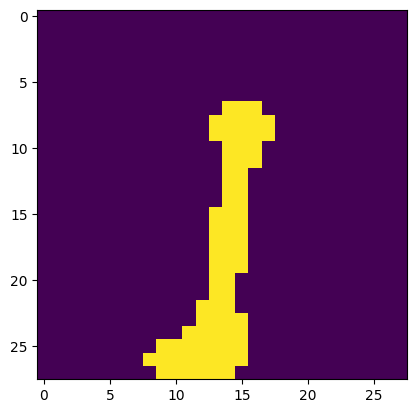

loss at end of epoch 103: 17469.68359375
test loss at end of epoch 103: 17796.734375
RECONSTRUCTED


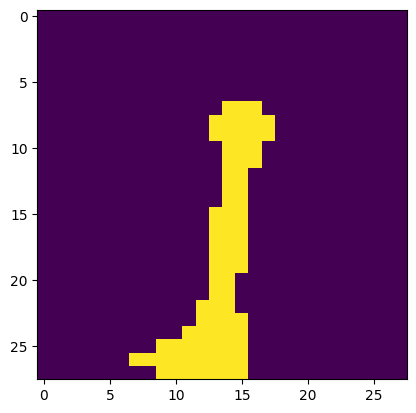

loss at end of epoch 104: 18801.955078125
test loss at end of epoch 104: 18164.736328125
RECONSTRUCTED


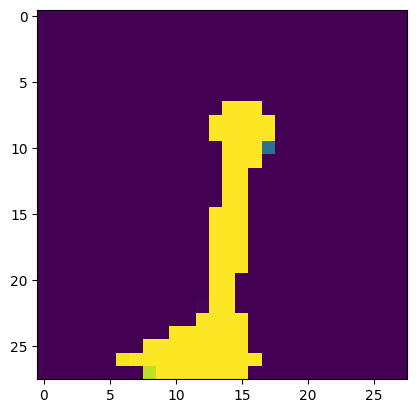

loss at end of epoch 105: 17896.359375
test loss at end of epoch 105: 18111.21484375
RECONSTRUCTED


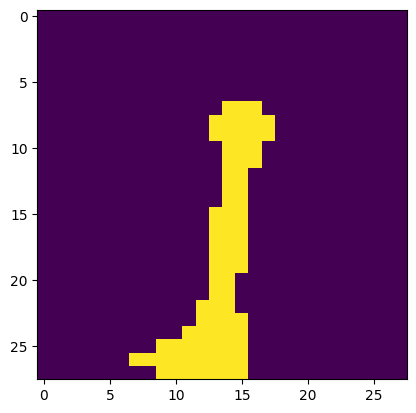

loss at end of epoch 106: 18018.984375
test loss at end of epoch 106: 17882.58984375
RECONSTRUCTED


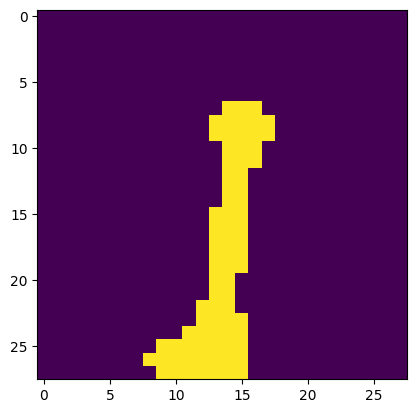

loss at end of epoch 107: 18321.916015625
test loss at end of epoch 107: 18573.001953125
RECONSTRUCTED


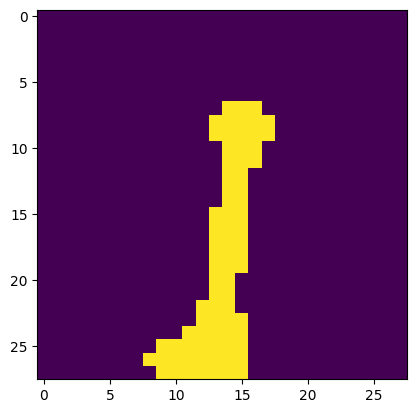

loss at end of epoch 108: 18313.140625
test loss at end of epoch 108: 18431.3203125
RECONSTRUCTED


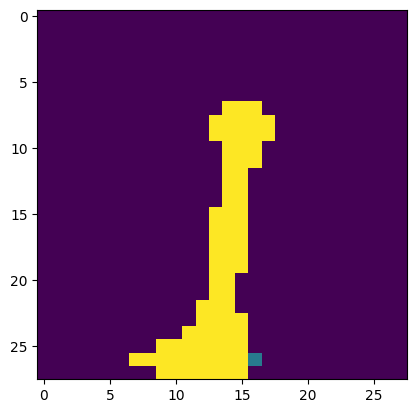

loss at end of epoch 109: 18570.4453125
test loss at end of epoch 109: 17939.1953125
RECONSTRUCTED


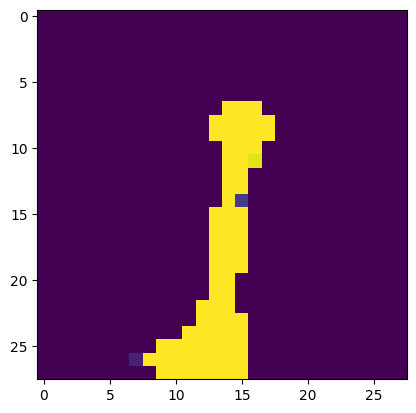

loss at end of epoch 110: 18489.322265625
test loss at end of epoch 110: 17660.48828125
RECONSTRUCTED


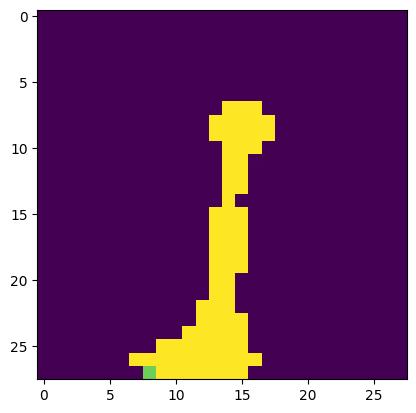

loss at end of epoch 111: 18282.892578125
test loss at end of epoch 111: 17824.892578125
RECONSTRUCTED


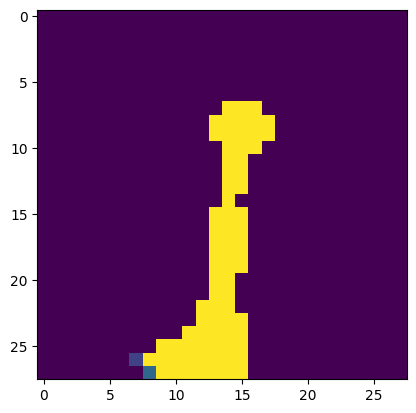

loss at end of epoch 112: 16782.99609375
test loss at end of epoch 112: 18320.5625
RECONSTRUCTED


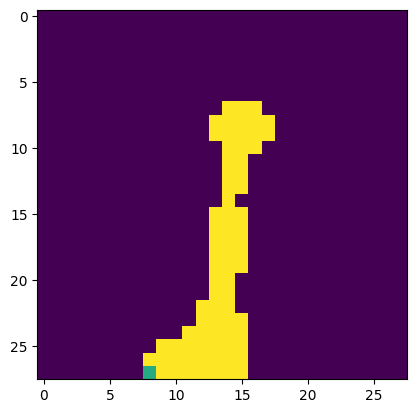

loss at end of epoch 113: 18811.1171875
test loss at end of epoch 113: 18982.00390625
RECONSTRUCTED


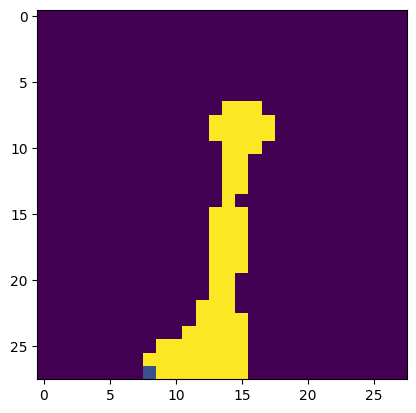

loss at end of epoch 114: 18437.341796875
test loss at end of epoch 114: 17800.13671875
RECONSTRUCTED


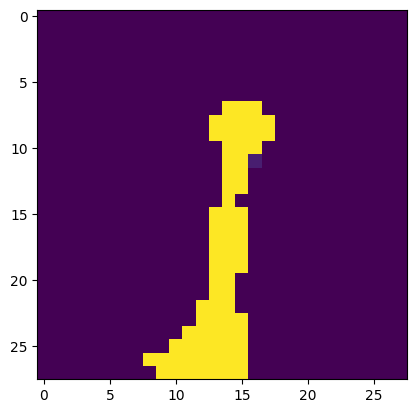

loss at end of epoch 115: 18731.111328125
test loss at end of epoch 115: 17758.759765625
RECONSTRUCTED


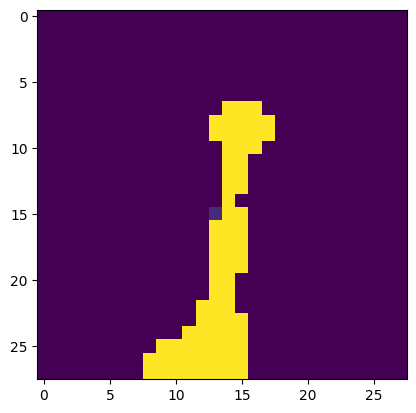

loss at end of epoch 116: 17546.904296875
test loss at end of epoch 116: 18207.6796875
RECONSTRUCTED


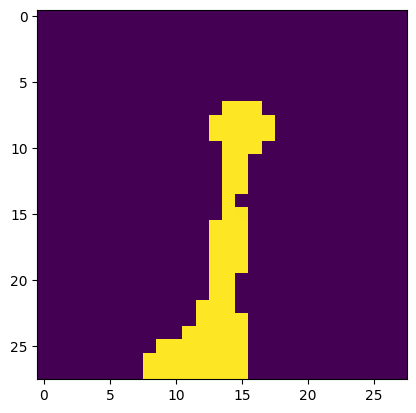

loss at end of epoch 117: 18695.34765625
test loss at end of epoch 117: 17857.623046875
RECONSTRUCTED


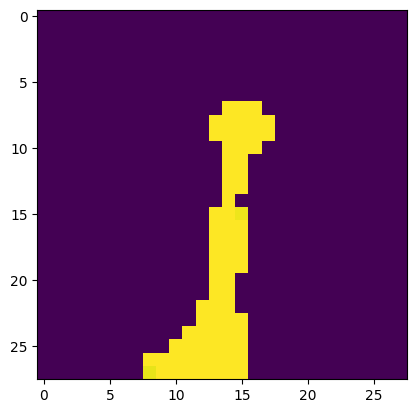

loss at end of epoch 118: 18260.341796875
test loss at end of epoch 118: 18469.66015625
RECONSTRUCTED


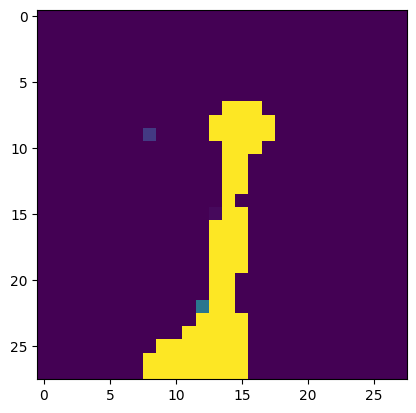

loss at end of epoch 119: 18573.04296875
test loss at end of epoch 119: 17877.181640625
RECONSTRUCTED


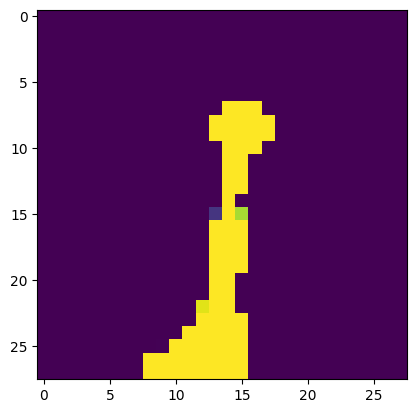

loss at end of epoch 120: 17538.12890625
test loss at end of epoch 120: 17971.30078125
RECONSTRUCTED


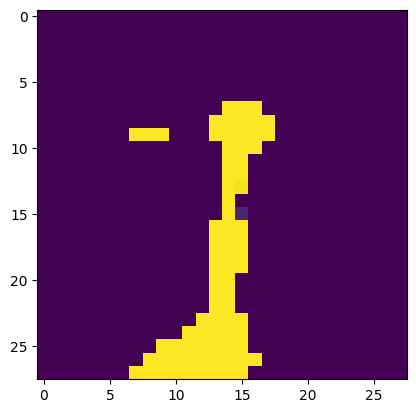

loss at end of epoch 121: 17532.20703125
test loss at end of epoch 121: 17733.810546875
RECONSTRUCTED


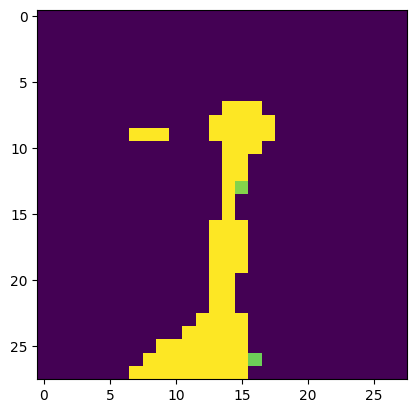

loss at end of epoch 122: 18135.509765625
test loss at end of epoch 122: 18032.833984375
RECONSTRUCTED


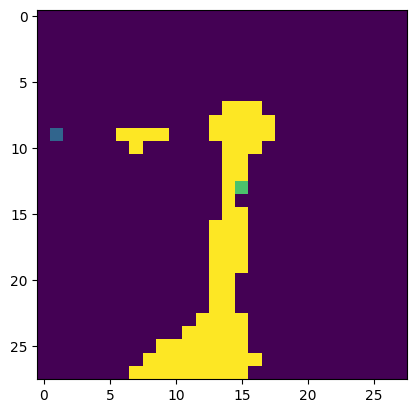

loss at end of epoch 123: 17867.57421875
test loss at end of epoch 123: 18505.76171875
RECONSTRUCTED


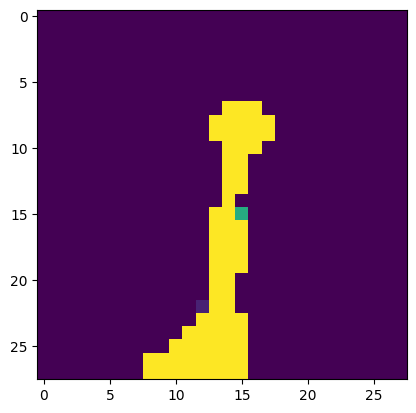

loss at end of epoch 124: 18338.6171875
test loss at end of epoch 124: 17626.5390625
RECONSTRUCTED


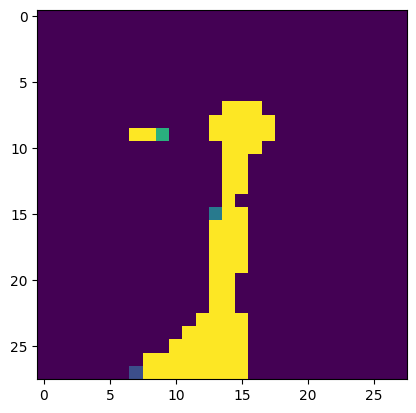

loss at end of epoch 125: 17770.103515625
test loss at end of epoch 125: 17865.189453125
RECONSTRUCTED


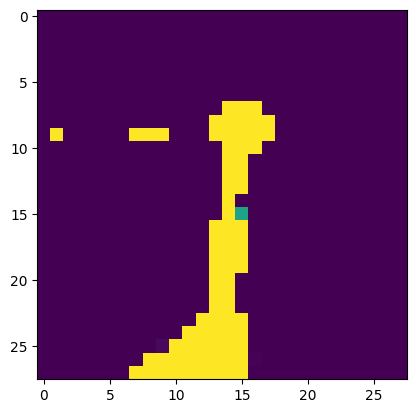

loss at end of epoch 126: 18274.638671875
test loss at end of epoch 126: 18172.25390625
RECONSTRUCTED


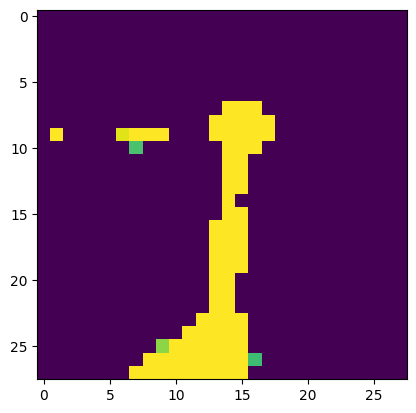

loss at end of epoch 127: 18118.109375
test loss at end of epoch 127: 17213.951171875
RECONSTRUCTED


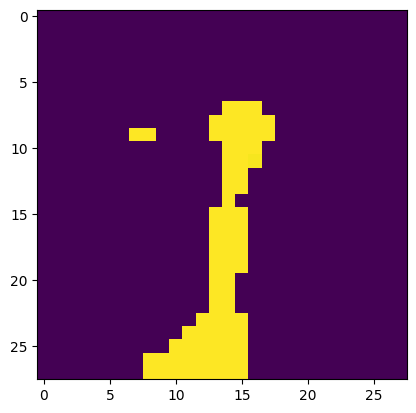

loss at end of epoch 128: 17889.71484375
test loss at end of epoch 128: 17735.771484375
RECONSTRUCTED


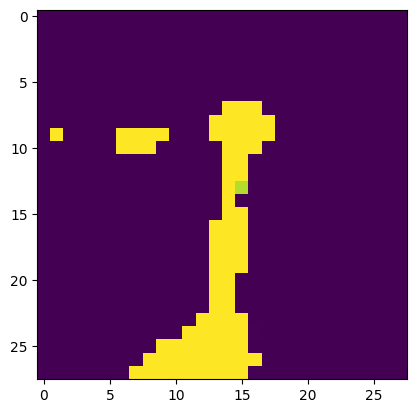

loss at end of epoch 129: 17810.28125
test loss at end of epoch 129: 17031.330078125
RECONSTRUCTED


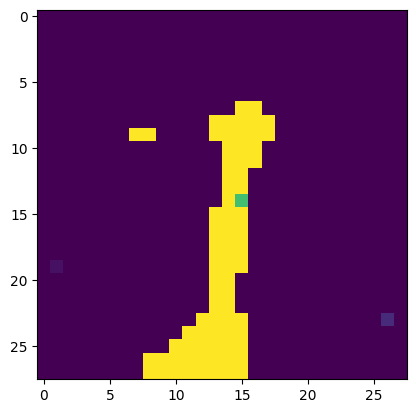

loss at end of epoch 130: 18037.79296875
test loss at end of epoch 130: 17521.65234375
RECONSTRUCTED


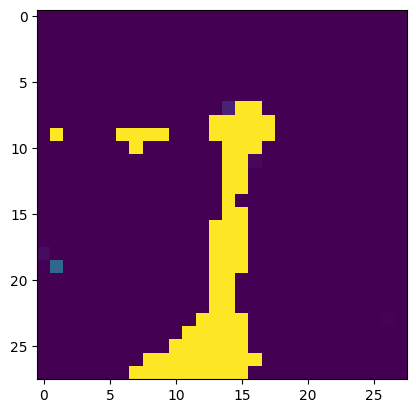

loss at end of epoch 131: 17076.91015625
test loss at end of epoch 131: 16783.58984375
RECONSTRUCTED


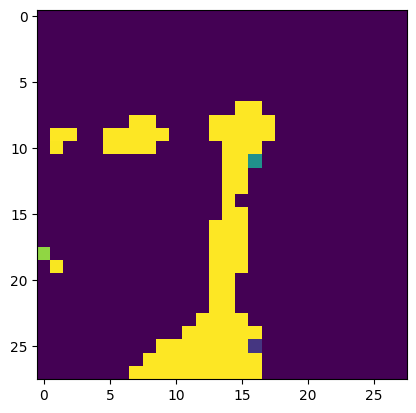

loss at end of epoch 132: 18156.935546875
test loss at end of epoch 132: 17450.94140625
RECONSTRUCTED


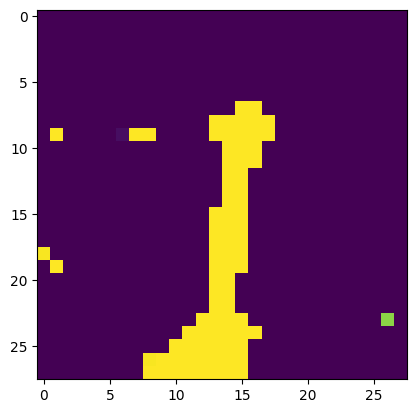

loss at end of epoch 133: 18525.09765625
test loss at end of epoch 133: 17945.775390625
RECONSTRUCTED


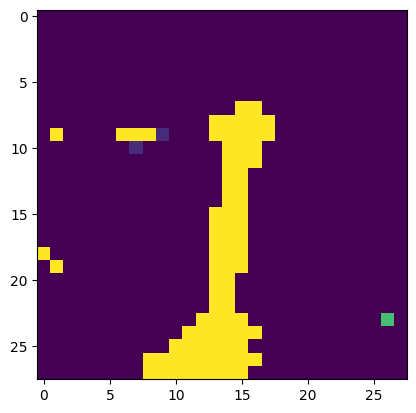

loss at end of epoch 134: 18022.8828125
test loss at end of epoch 134: 18084.767578125
RECONSTRUCTED


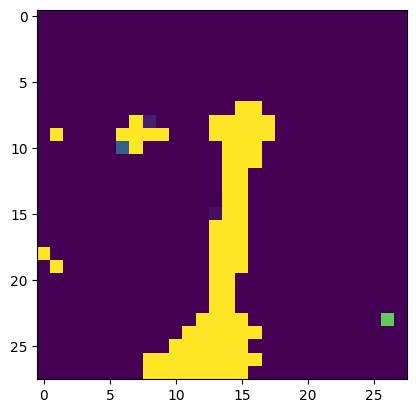

loss at end of epoch 135: 18133.95703125
test loss at end of epoch 135: 17178.73828125
RECONSTRUCTED


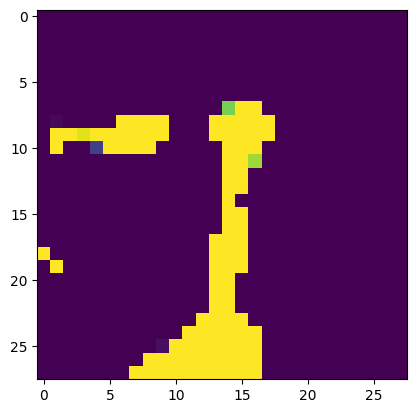

loss at end of epoch 136: 17428.78515625
test loss at end of epoch 136: 18343.255859375
RECONSTRUCTED


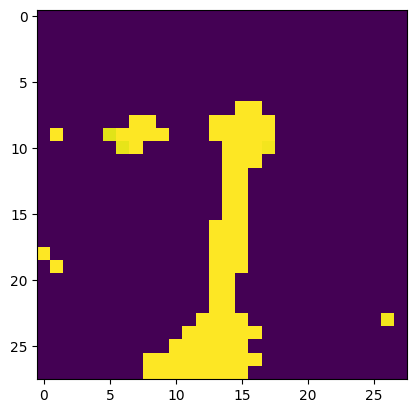

loss at end of epoch 137: 16893.927734375
test loss at end of epoch 137: 17379.58984375
RECONSTRUCTED


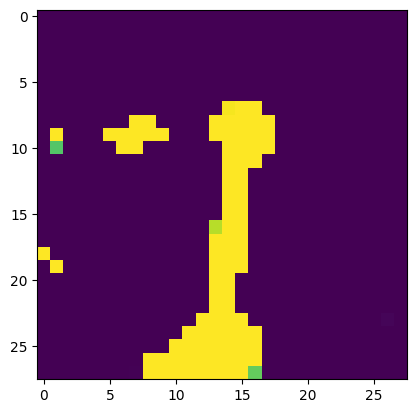

loss at end of epoch 138: 16932.443359375
test loss at end of epoch 138: 17971.201171875
RECONSTRUCTED


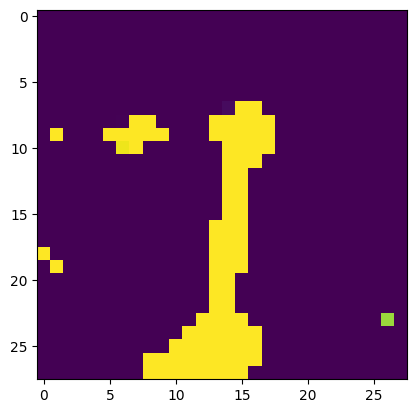

loss at end of epoch 139: 17863.0
test loss at end of epoch 139: 17450.853515625
RECONSTRUCTED


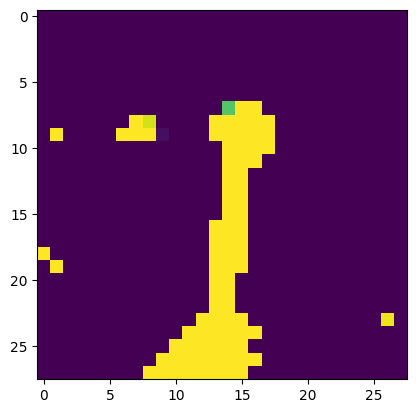

loss at end of epoch 140: 17170.533203125
test loss at end of epoch 140: 17356.22265625
RECONSTRUCTED


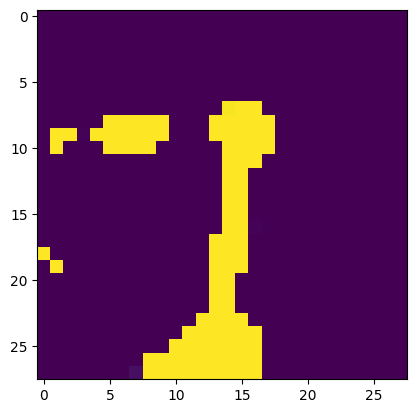

loss at end of epoch 141: 16895.119140625
test loss at end of epoch 141: 16969.984375
RECONSTRUCTED


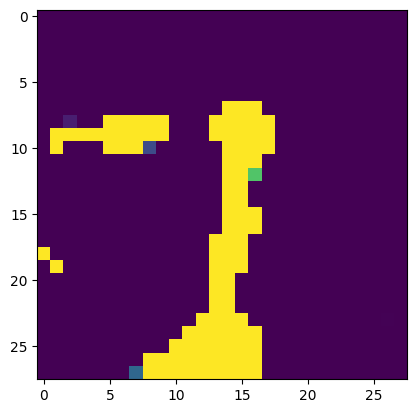

loss at end of epoch 142: 17792.029296875
test loss at end of epoch 142: 18313.650390625
RECONSTRUCTED


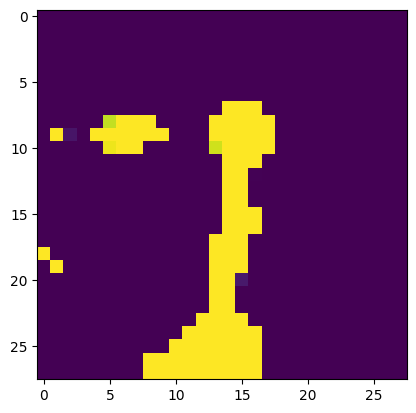

loss at end of epoch 143: 17876.669921875
test loss at end of epoch 143: 16764.814453125
RECONSTRUCTED


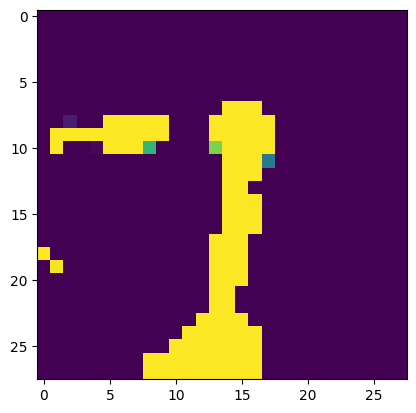

loss at end of epoch 144: 17479.9921875
test loss at end of epoch 144: 17114.736328125
RECONSTRUCTED


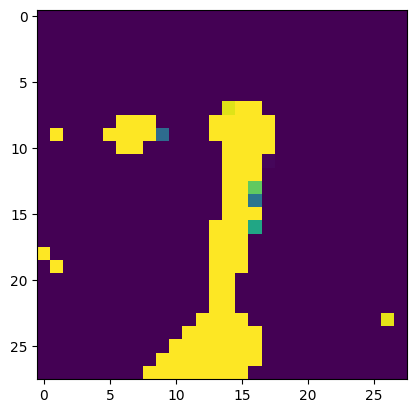

loss at end of epoch 145: 16495.744140625
test loss at end of epoch 145: 16553.98046875
RECONSTRUCTED


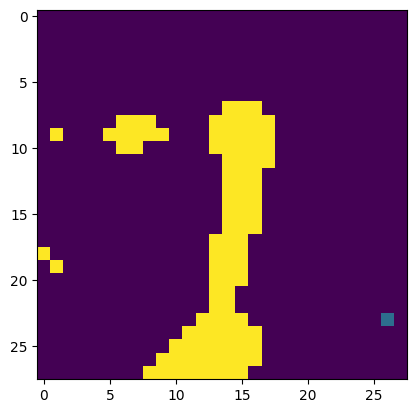

loss at end of epoch 146: 17264.6953125
test loss at end of epoch 146: 16488.748046875
RECONSTRUCTED


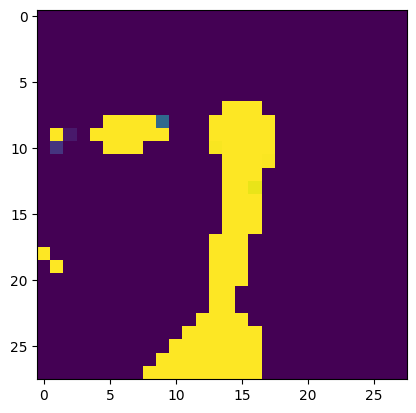

loss at end of epoch 147: 16827.654296875
test loss at end of epoch 147: 17177.474609375
RECONSTRUCTED


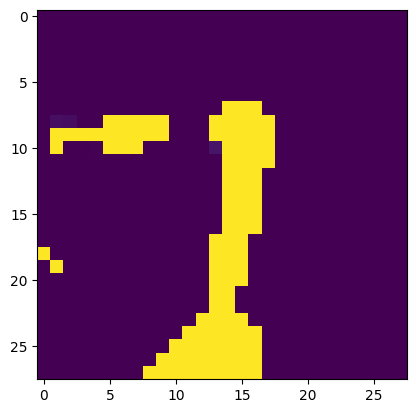

loss at end of epoch 148: 17731.384765625
test loss at end of epoch 148: 16968.9296875
RECONSTRUCTED


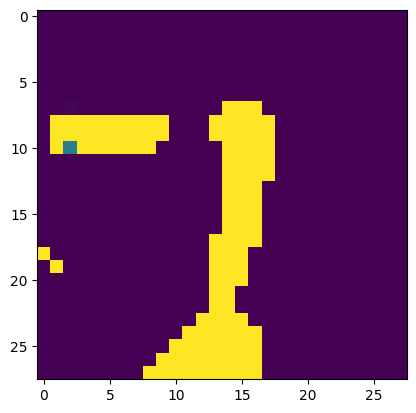

loss at end of epoch 149: 17507.44921875
test loss at end of epoch 149: 17408.373046875
RECONSTRUCTED


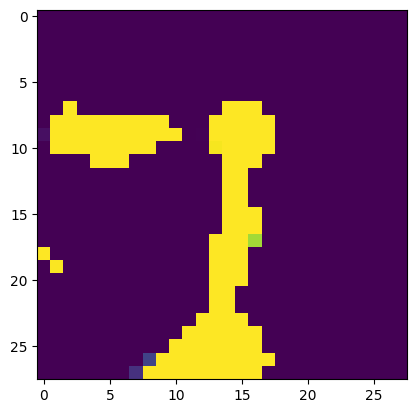

loss at end of epoch 150: 17413.009765625
test loss at end of epoch 150: 16290.1357421875
RECONSTRUCTED


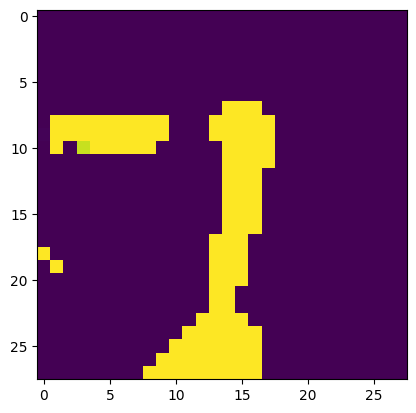

loss at end of epoch 151: 17543.9765625
test loss at end of epoch 151: 16865.400390625
RECONSTRUCTED


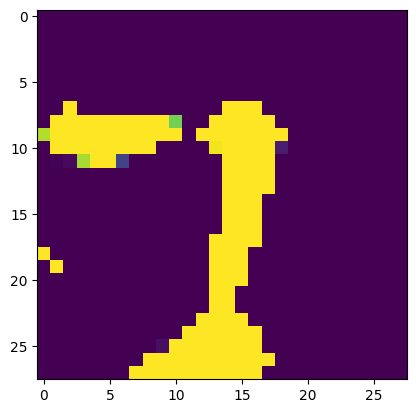

loss at end of epoch 152: 17259.525390625
test loss at end of epoch 152: 16554.232421875
RECONSTRUCTED


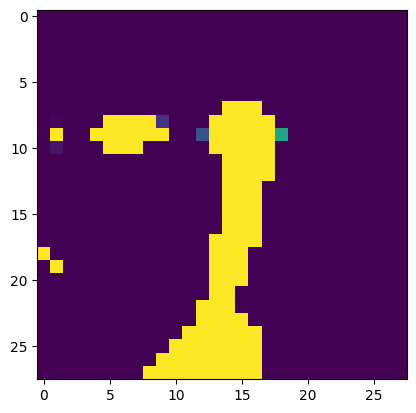

loss at end of epoch 153: 16990.080078125
test loss at end of epoch 153: 17178.24609375
RECONSTRUCTED


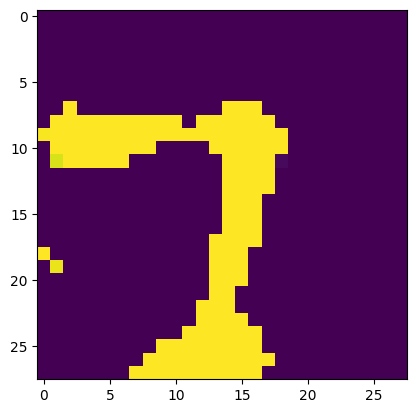

loss at end of epoch 154: 16940.662109375
test loss at end of epoch 154: 17628.443359375
RECONSTRUCTED


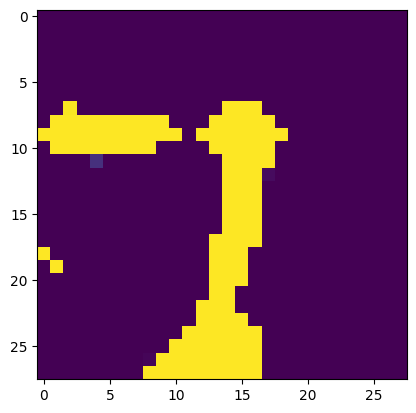

loss at end of epoch 155: 16563.85546875
test loss at end of epoch 155: 17705.025390625
RECONSTRUCTED


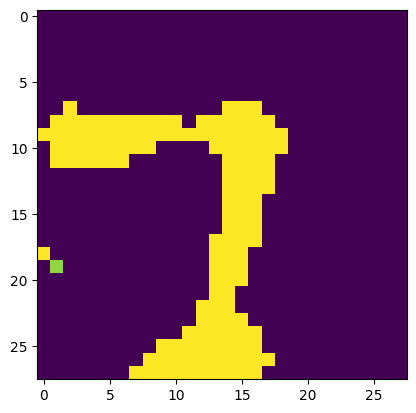

loss at end of epoch 156: 16797.90625
test loss at end of epoch 156: 17055.970703125
RECONSTRUCTED


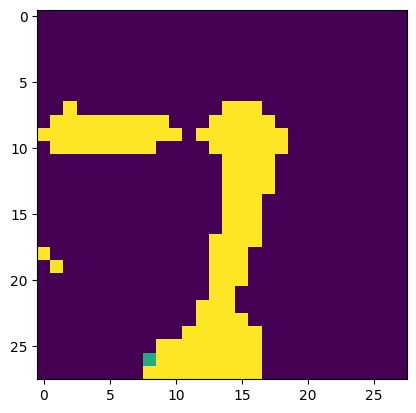

loss at end of epoch 157: 17066.6875
test loss at end of epoch 157: 16655.12890625
RECONSTRUCTED


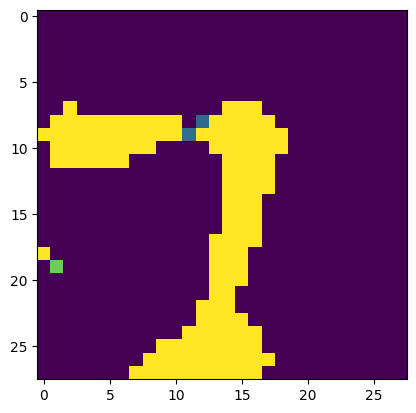

loss at end of epoch 158: 17251.52734375
test loss at end of epoch 158: 16583.38671875
RECONSTRUCTED


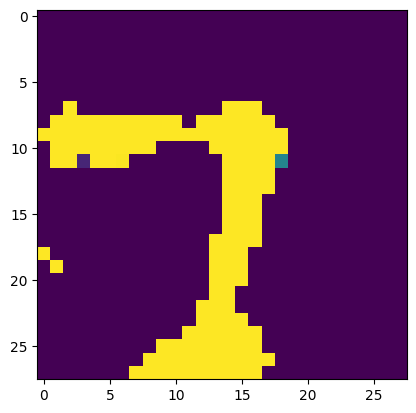

loss at end of epoch 159: 16501.439453125
test loss at end of epoch 159: 17178.259765625
RECONSTRUCTED


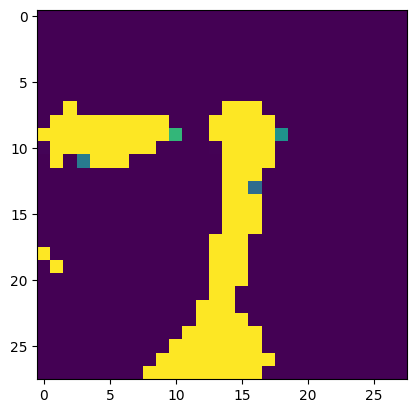

loss at end of epoch 160: 16009.0654296875
test loss at end of epoch 160: 16356.755859375
RECONSTRUCTED


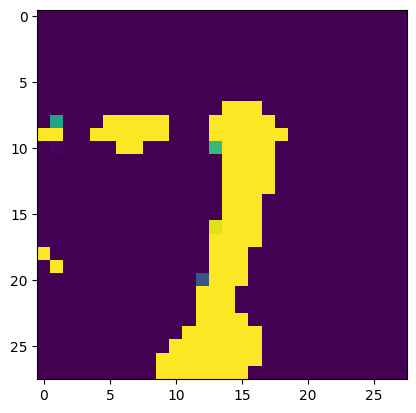

loss at end of epoch 161: 17158.728515625
test loss at end of epoch 161: 16825.763671875
RECONSTRUCTED


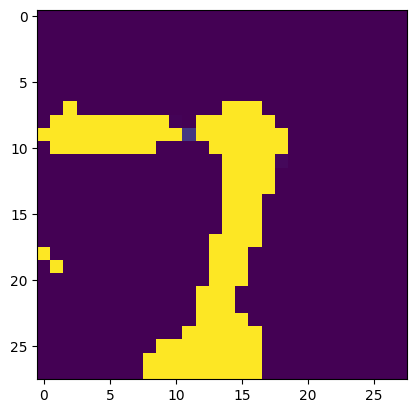

loss at end of epoch 162: 17098.69921875
test loss at end of epoch 162: 17093.140625
RECONSTRUCTED


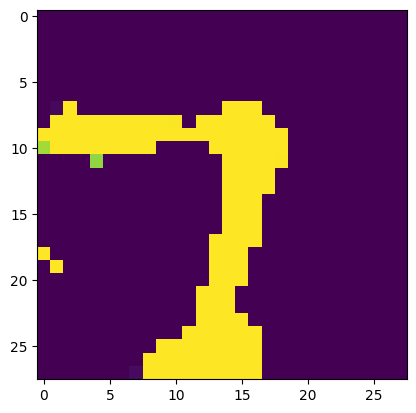

loss at end of epoch 163: 16607.7109375
test loss at end of epoch 163: 16755.2890625
RECONSTRUCTED


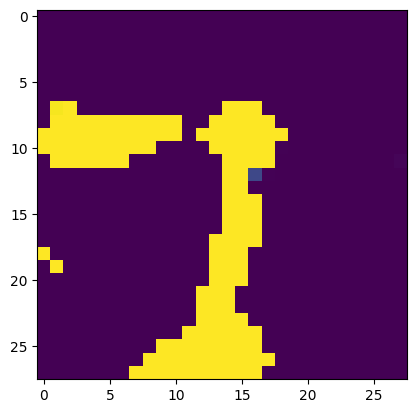

loss at end of epoch 164: 15996.5400390625
test loss at end of epoch 164: 17058.2265625
RECONSTRUCTED


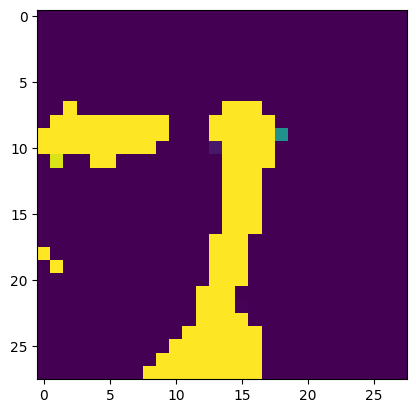

loss at end of epoch 165: 16439.626953125
test loss at end of epoch 165: 16618.25
RECONSTRUCTED


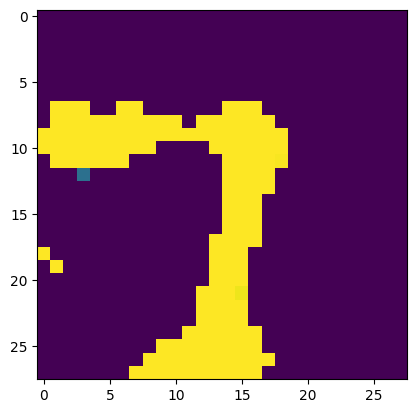

loss at end of epoch 166: 17157.294921875
test loss at end of epoch 166: 16661.44921875
RECONSTRUCTED


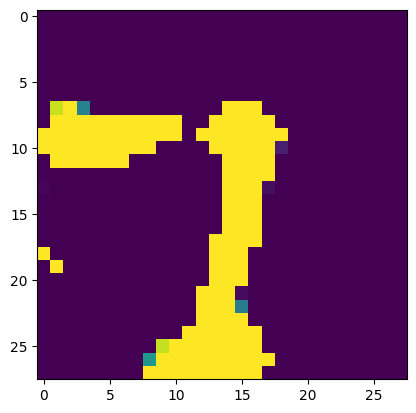

loss at end of epoch 167: 16220.4716796875
test loss at end of epoch 167: 16218.6376953125
RECONSTRUCTED


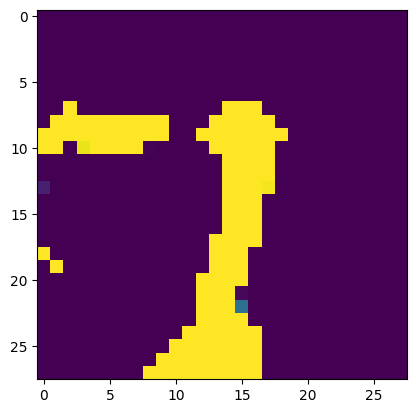

loss at end of epoch 168: 16673.7734375
test loss at end of epoch 168: 16737.806640625
RECONSTRUCTED


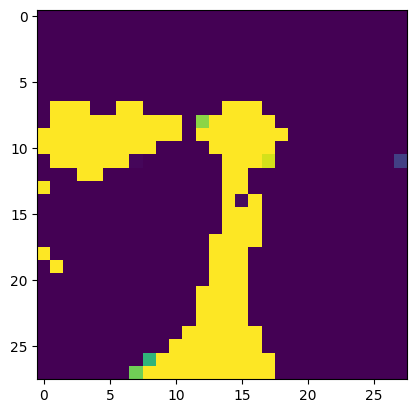

loss at end of epoch 169: 16352.46875
test loss at end of epoch 169: 17146.337890625
RECONSTRUCTED


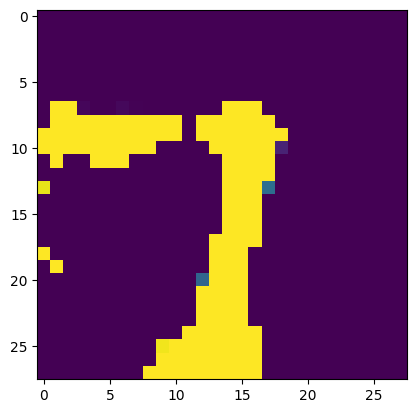

loss at end of epoch 170: 17193.099609375
test loss at end of epoch 170: 15950.6171875
RECONSTRUCTED


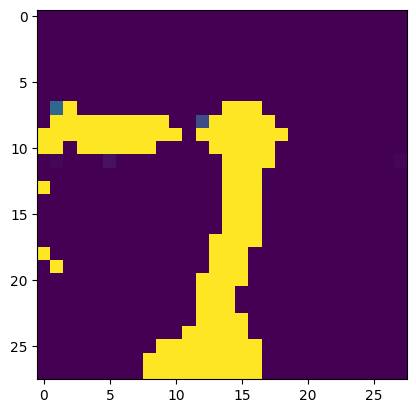

loss at end of epoch 171: 16884.833984375
test loss at end of epoch 171: 16338.462890625
RECONSTRUCTED


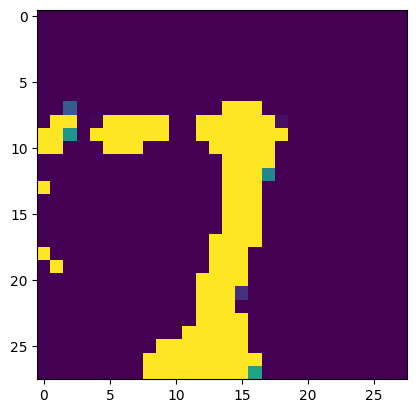

loss at end of epoch 172: 16505.654296875
test loss at end of epoch 172: 17336.29296875
RECONSTRUCTED


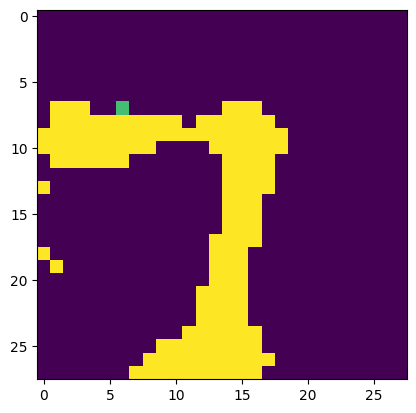

loss at end of epoch 173: 16714.55078125
test loss at end of epoch 173: 16895.66015625
RECONSTRUCTED


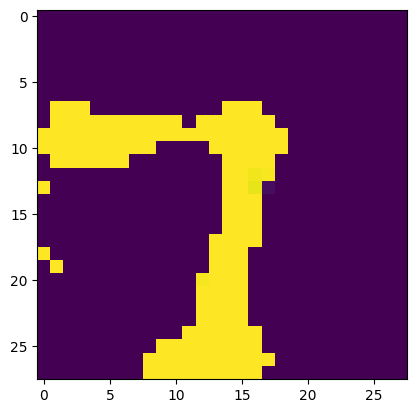

loss at end of epoch 174: 16481.861328125
test loss at end of epoch 174: 17018.048828125
RECONSTRUCTED


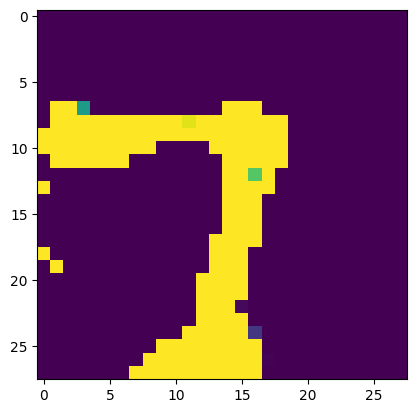

loss at end of epoch 175: 16783.75390625
test loss at end of epoch 175: 16819.71875
RECONSTRUCTED


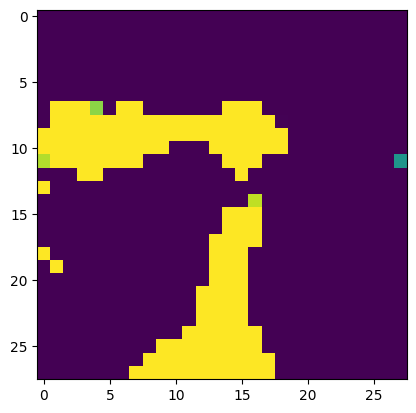

loss at end of epoch 176: 16973.072265625
test loss at end of epoch 176: 17012.65625
RECONSTRUCTED


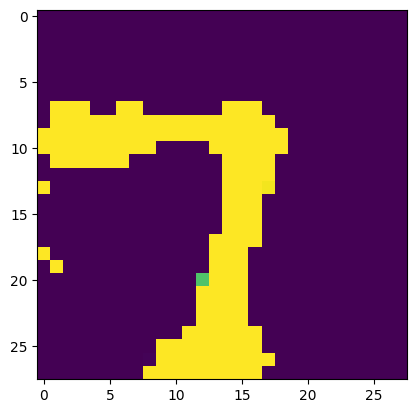

loss at end of epoch 177: 17245.673828125
test loss at end of epoch 177: 16478.787109375
RECONSTRUCTED


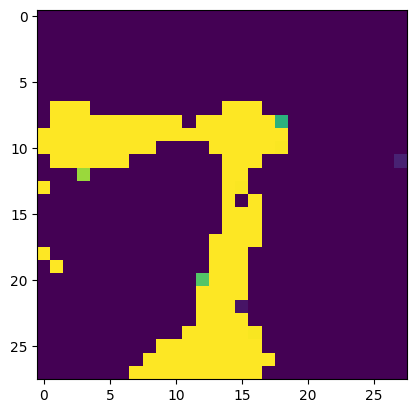

loss at end of epoch 178: 16375.427734375
test loss at end of epoch 178: 17006.828125
RECONSTRUCTED


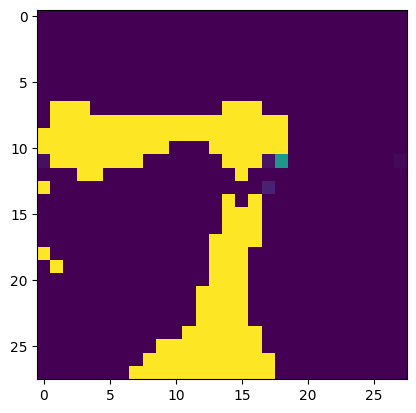

loss at end of epoch 179: 15965.53125
test loss at end of epoch 179: 16665.048828125
RECONSTRUCTED


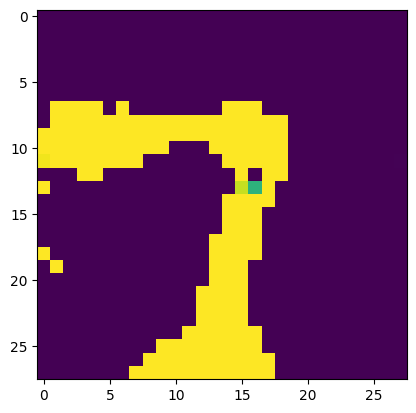

loss at end of epoch 180: 16106.3984375
test loss at end of epoch 180: 16539.818359375
RECONSTRUCTED


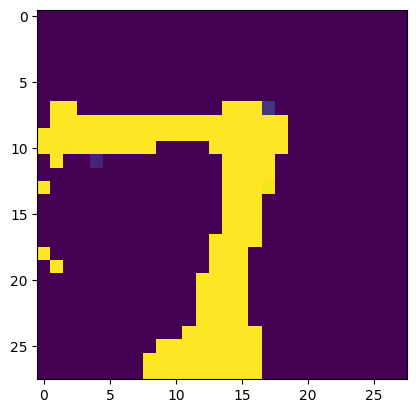

loss at end of epoch 181: 16365.591796875
test loss at end of epoch 181: 17071.576171875
RECONSTRUCTED


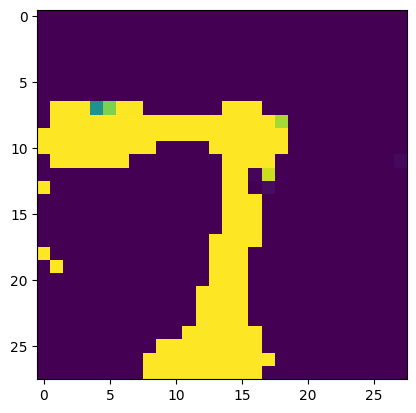

loss at end of epoch 182: 16757.0625
test loss at end of epoch 182: 17183.931640625
RECONSTRUCTED


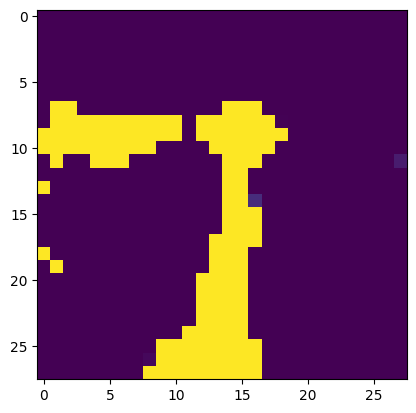

loss at end of epoch 183: 16192.244140625
test loss at end of epoch 183: 16629.666015625
RECONSTRUCTED


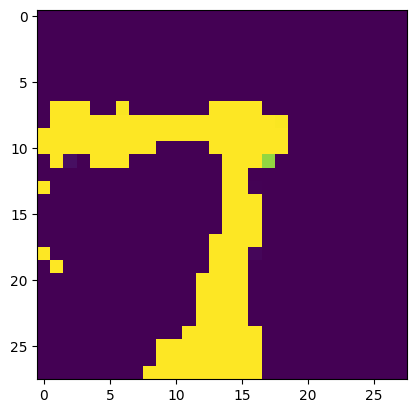

loss at end of epoch 184: 16853.166015625
test loss at end of epoch 184: 15795.8408203125
RECONSTRUCTED


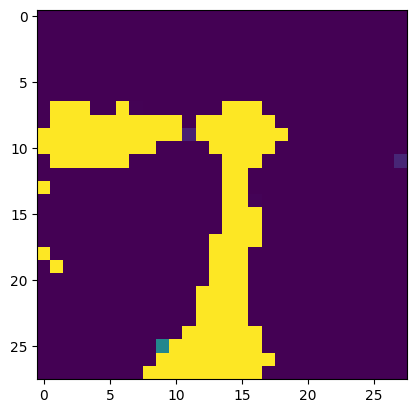

loss at end of epoch 185: 15291.7919921875
test loss at end of epoch 185: 16779.037109375
RECONSTRUCTED


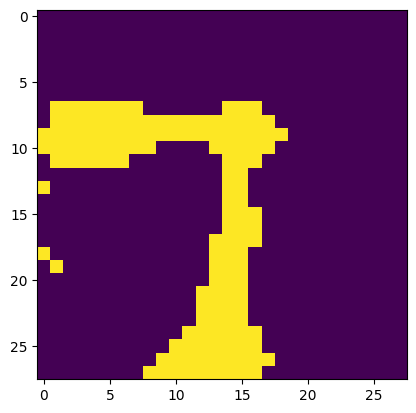

loss at end of epoch 186: 16358.1962890625
test loss at end of epoch 186: 16547.53125
RECONSTRUCTED


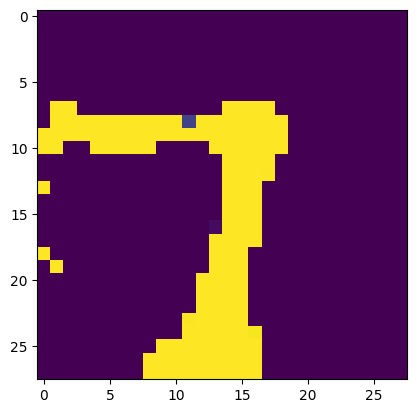

loss at end of epoch 187: 15859.486328125
test loss at end of epoch 187: 15913.845703125
RECONSTRUCTED


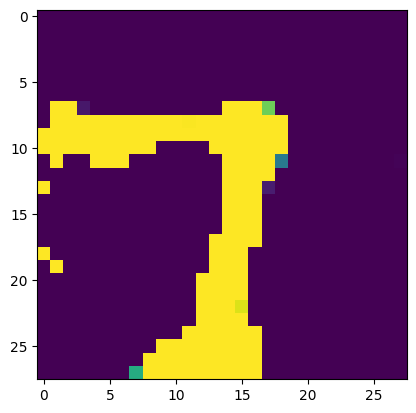

loss at end of epoch 188: 16292.12109375
test loss at end of epoch 188: 16002.8486328125
RECONSTRUCTED


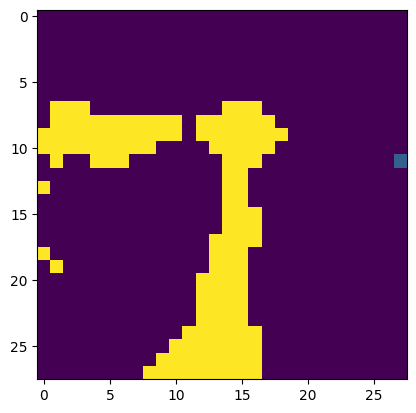

loss at end of epoch 189: 16868.5234375
test loss at end of epoch 189: 16530.501953125
RECONSTRUCTED


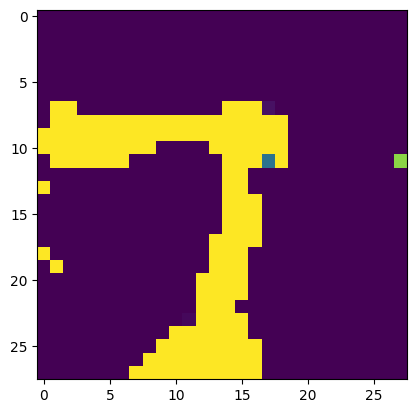

loss at end of epoch 190: 16890.91796875
test loss at end of epoch 190: 16490.107421875
RECONSTRUCTED


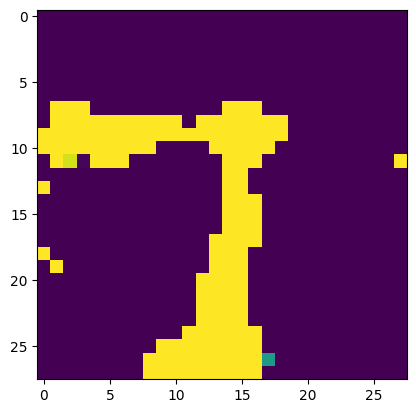

loss at end of epoch 191: 15513.822265625
test loss at end of epoch 191: 16120.53515625
RECONSTRUCTED


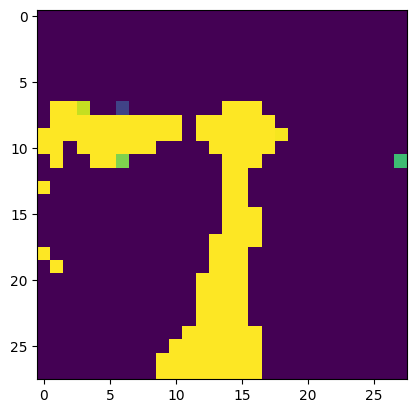

loss at end of epoch 192: 16285.6015625
test loss at end of epoch 192: 16395.986328125
RECONSTRUCTED


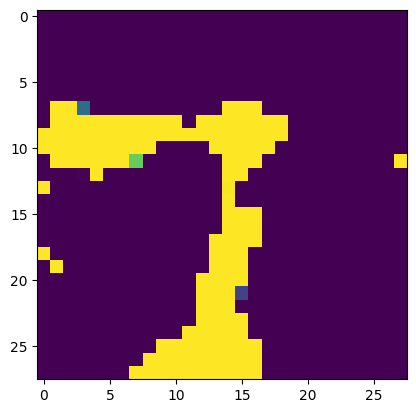

loss at end of epoch 193: 16766.193359375
test loss at end of epoch 193: 16268.779296875
RECONSTRUCTED


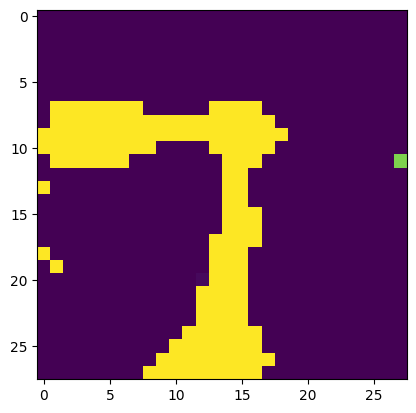

loss at end of epoch 194: 16663.01953125
test loss at end of epoch 194: 16038.333984375
RECONSTRUCTED


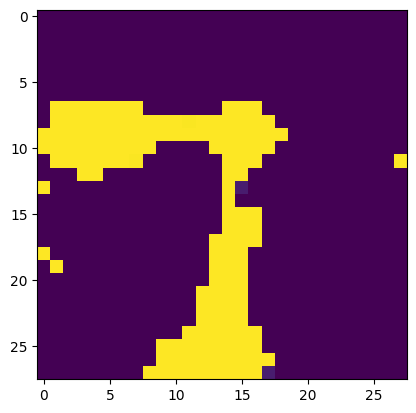

loss at end of epoch 195: 16589.515625
test loss at end of epoch 195: 15836.3564453125
RECONSTRUCTED


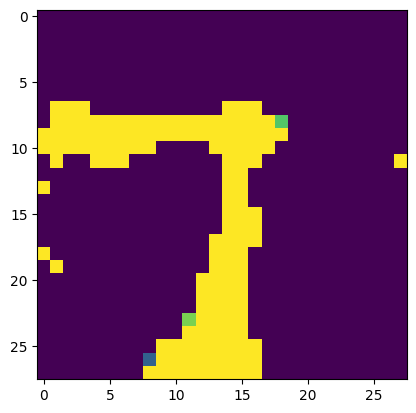

loss at end of epoch 196: 16819.267578125
test loss at end of epoch 196: 16440.833984375
RECONSTRUCTED


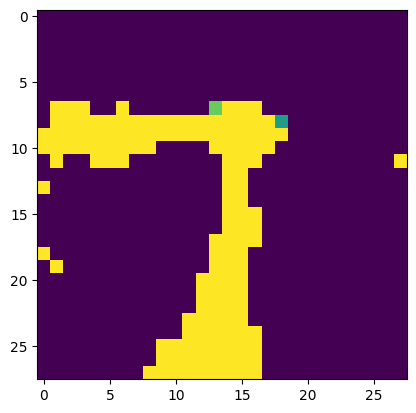

loss at end of epoch 197: 16001.1005859375
test loss at end of epoch 197: 15919.90234375
RECONSTRUCTED


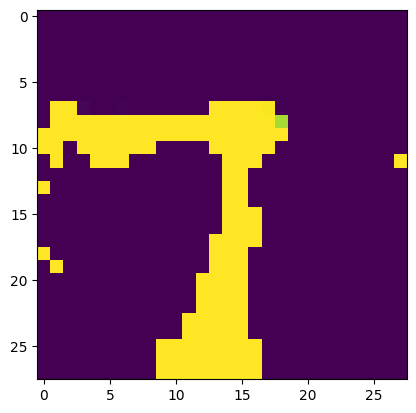

loss at end of epoch 198: 16476.80859375
test loss at end of epoch 198: 16039.7568359375
RECONSTRUCTED


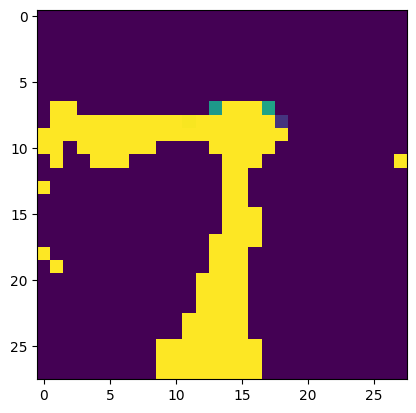

loss at end of epoch 199: 16329.3046875
test loss at end of epoch 199: 16539.896484375
RECONSTRUCTED


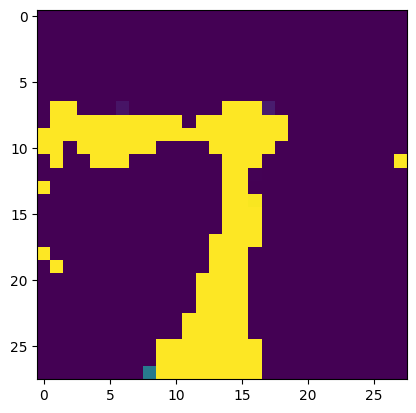

loss at end of epoch 200: 16016.94140625
test loss at end of epoch 200: 15239.9345703125
RECONSTRUCTED


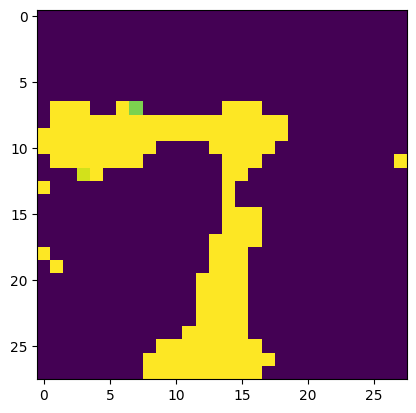

loss at end of epoch 201: 16114.0400390625
test loss at end of epoch 201: 15544.26953125
RECONSTRUCTED


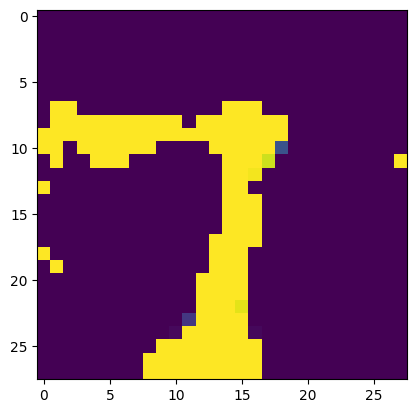

loss at end of epoch 202: 15619.509765625
test loss at end of epoch 202: 16047.626953125
RECONSTRUCTED


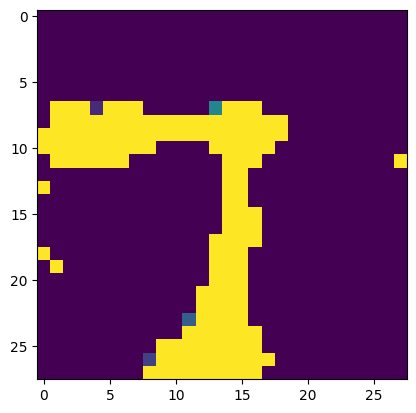

loss at end of epoch 203: 16411.2734375
test loss at end of epoch 203: 15910.9892578125
RECONSTRUCTED


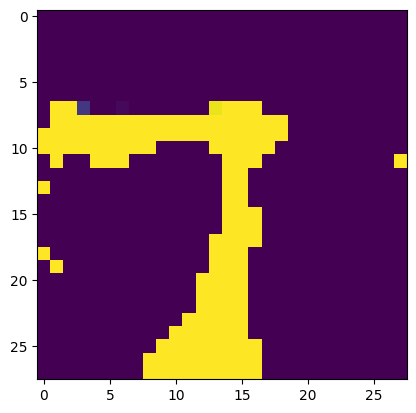

loss at end of epoch 204: 16352.9384765625
test loss at end of epoch 204: 16593.720703125
RECONSTRUCTED


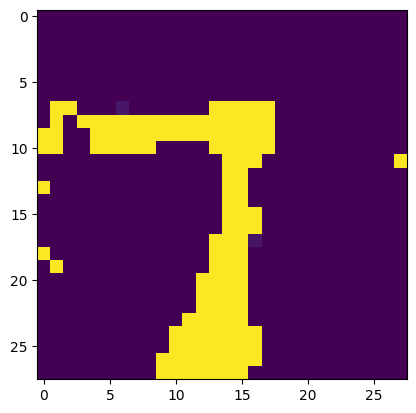

loss at end of epoch 205: 15701.6015625
test loss at end of epoch 205: 16159.388671875
RECONSTRUCTED


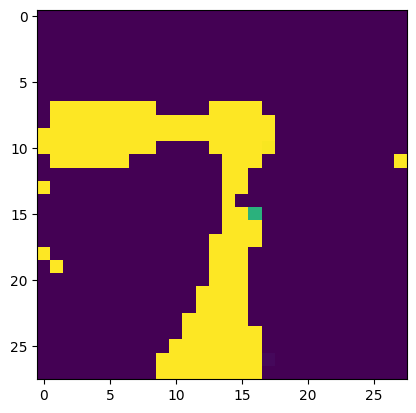

loss at end of epoch 206: 16316.251953125
test loss at end of epoch 206: 16108.26953125
RECONSTRUCTED


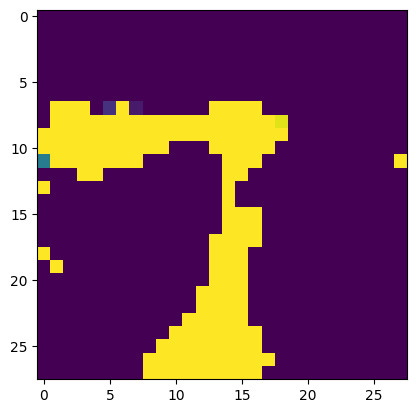

loss at end of epoch 207: 16404.51953125
test loss at end of epoch 207: 16212.109375
RECONSTRUCTED


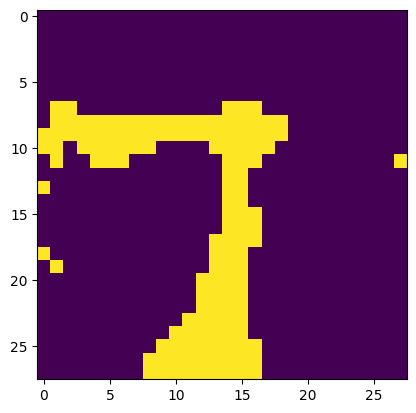

loss at end of epoch 208: 16110.083984375
test loss at end of epoch 208: 15492.228515625
RECONSTRUCTED


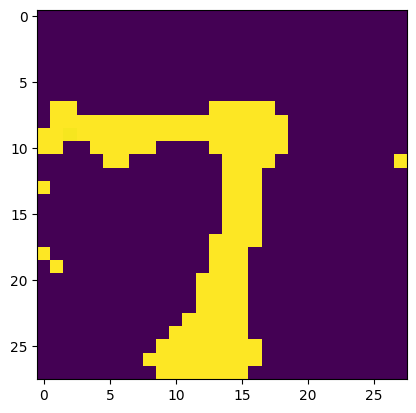

loss at end of epoch 209: 15687.5654296875
test loss at end of epoch 209: 15712.388671875
RECONSTRUCTED


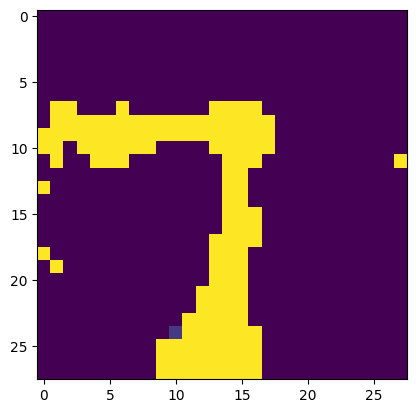

loss at end of epoch 210: 15193.1904296875
test loss at end of epoch 210: 15894.056640625
RECONSTRUCTED


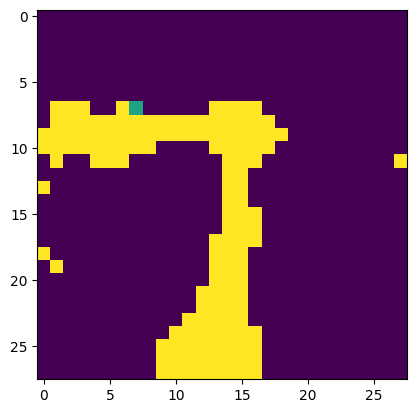

loss at end of epoch 211: 15250.6416015625
test loss at end of epoch 211: 15183.3525390625
RECONSTRUCTED


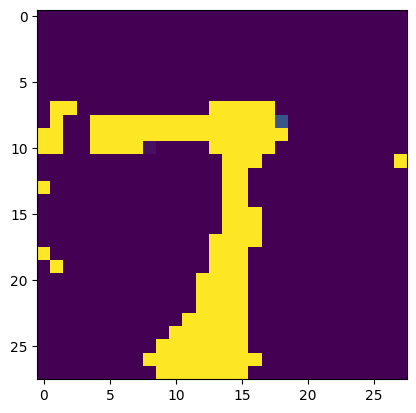

loss at end of epoch 212: 15622.7705078125
test loss at end of epoch 212: 14880.3876953125
RECONSTRUCTED


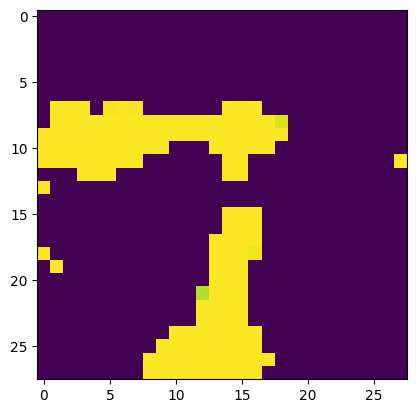

loss at end of epoch 213: 15922.9091796875
test loss at end of epoch 213: 15201.431640625
RECONSTRUCTED


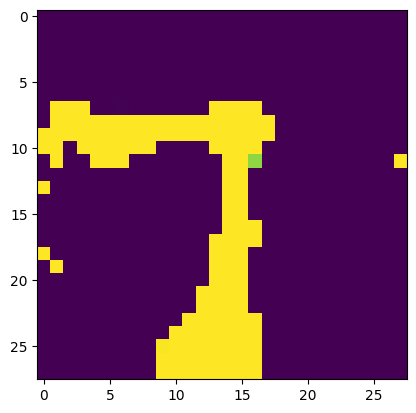

loss at end of epoch 214: 15926.3671875
test loss at end of epoch 214: 16141.4052734375
RECONSTRUCTED


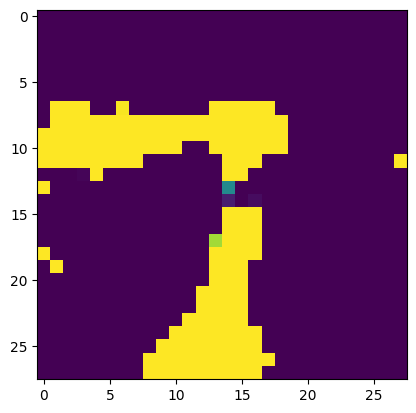

loss at end of epoch 215: 15786.28125
test loss at end of epoch 215: 14692.2158203125
RECONSTRUCTED


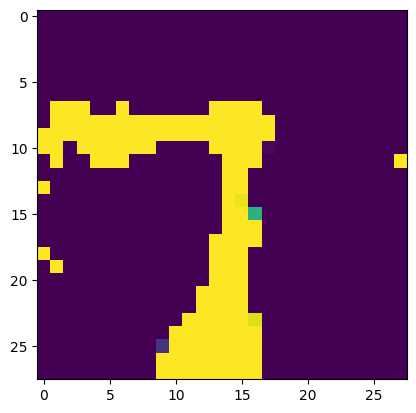

loss at end of epoch 216: 15360.384765625
test loss at end of epoch 216: 15049.3388671875
RECONSTRUCTED


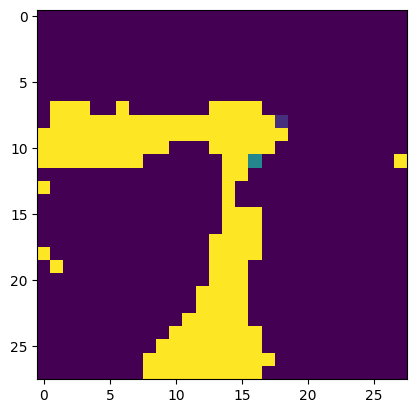

loss at end of epoch 217: 15753.529296875
test loss at end of epoch 217: 15782.96484375
RECONSTRUCTED


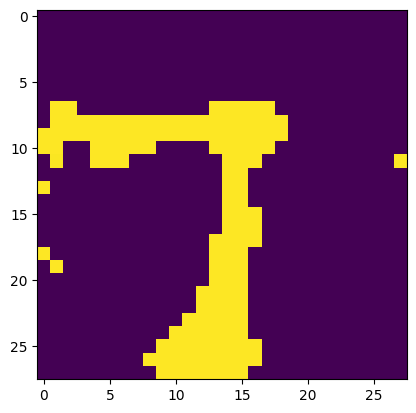

loss at end of epoch 218: 15626.39453125
test loss at end of epoch 218: 15074.822265625
RECONSTRUCTED


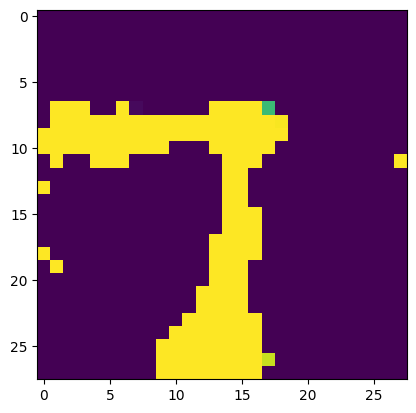

loss at end of epoch 219: 15304.326171875
test loss at end of epoch 219: 16723.265625
RECONSTRUCTED


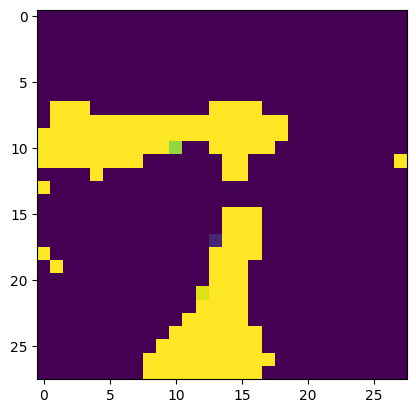

loss at end of epoch 220: 16092.234375
test loss at end of epoch 220: 15238.798828125
RECONSTRUCTED


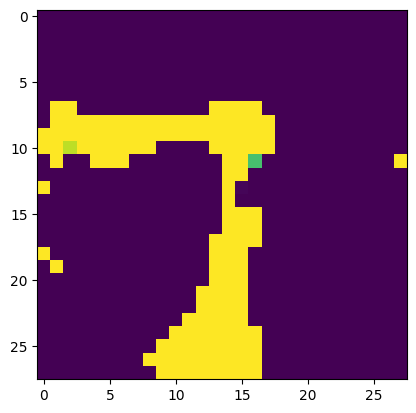

loss at end of epoch 221: 15293.546875
test loss at end of epoch 221: 15526.2353515625
RECONSTRUCTED


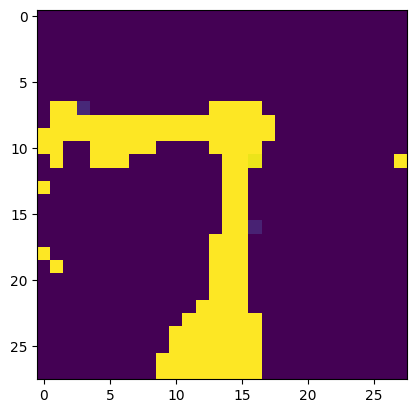

loss at end of epoch 222: 16205.669921875
test loss at end of epoch 222: 15531.25390625
RECONSTRUCTED


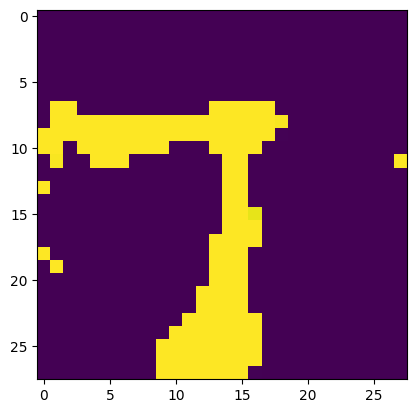

loss at end of epoch 223: 15323.4384765625
test loss at end of epoch 223: 15734.7265625
RECONSTRUCTED


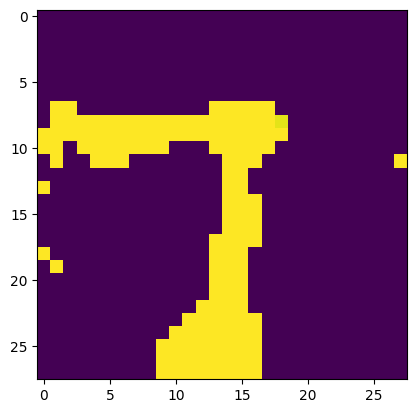

loss at end of epoch 224: 15658.41796875
test loss at end of epoch 224: 14995.7998046875
RECONSTRUCTED


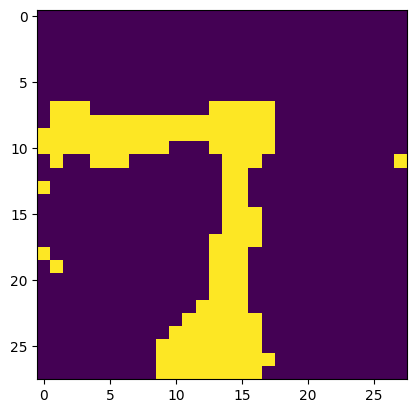

loss at end of epoch 225: 15216.091796875
test loss at end of epoch 225: 15929.265625
RECONSTRUCTED


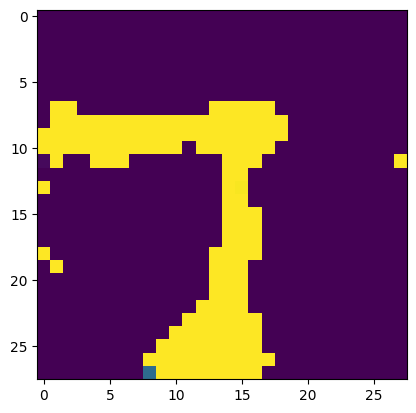

loss at end of epoch 226: 15120.9140625
test loss at end of epoch 226: 14549.484375
RECONSTRUCTED


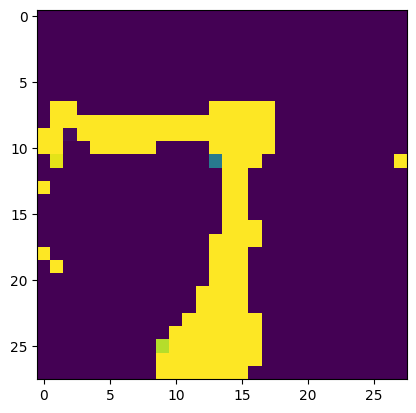

loss at end of epoch 227: 14682.7724609375
test loss at end of epoch 227: 14683.251953125
RECONSTRUCTED


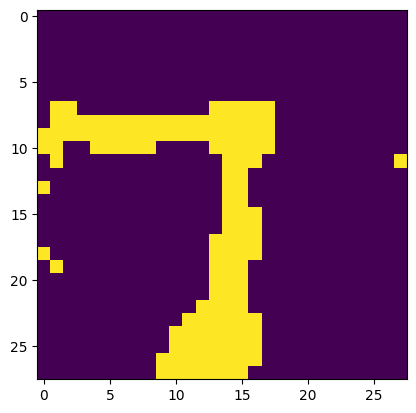

loss at end of epoch 228: 15063.634765625
test loss at end of epoch 228: 14684.6181640625
RECONSTRUCTED


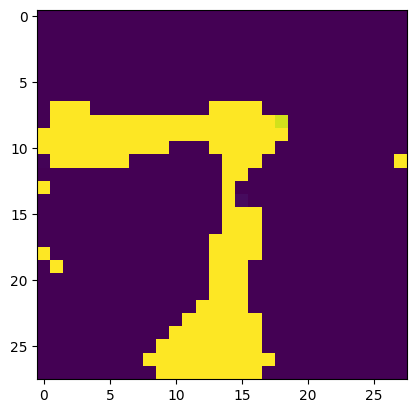

loss at end of epoch 229: 15288.8701171875
test loss at end of epoch 229: 15143.7060546875
RECONSTRUCTED


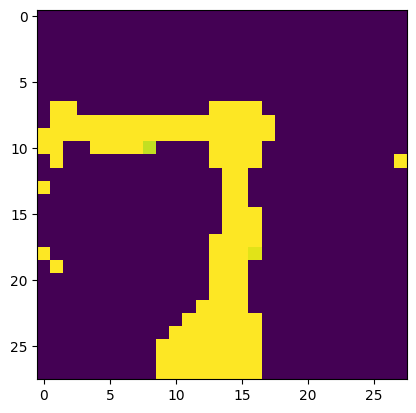

loss at end of epoch 230: 15951.365234375
test loss at end of epoch 230: 14897.705078125
RECONSTRUCTED


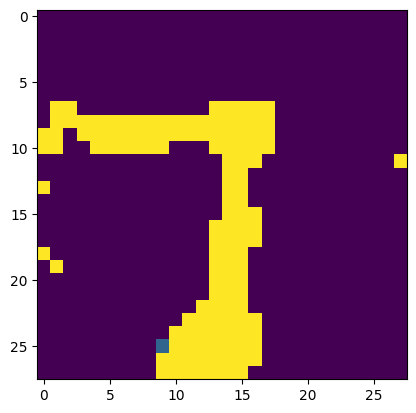

loss at end of epoch 231: 15112.033203125
test loss at end of epoch 231: 14945.5517578125
RECONSTRUCTED


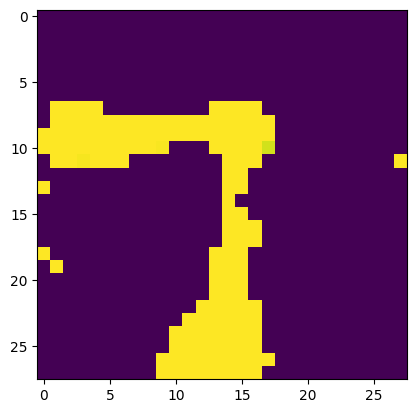

loss at end of epoch 232: 15530.9072265625
test loss at end of epoch 232: 15951.4775390625
RECONSTRUCTED


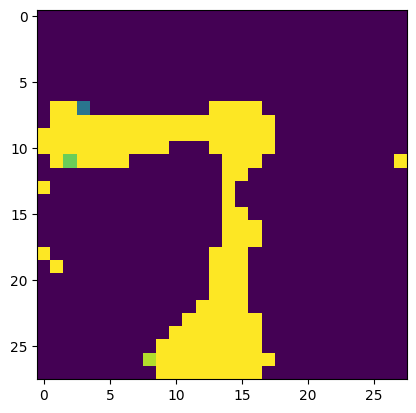

loss at end of epoch 233: 15375.169921875
test loss at end of epoch 233: 14961.248046875
RECONSTRUCTED


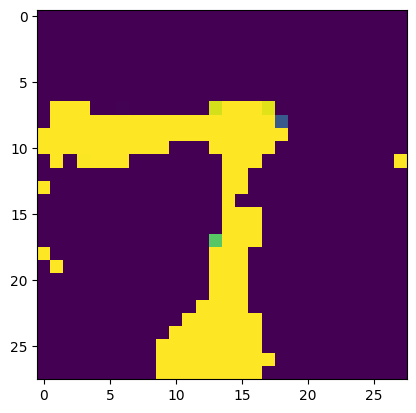

loss at end of epoch 234: 15753.77734375
test loss at end of epoch 234: 15011.056640625
RECONSTRUCTED


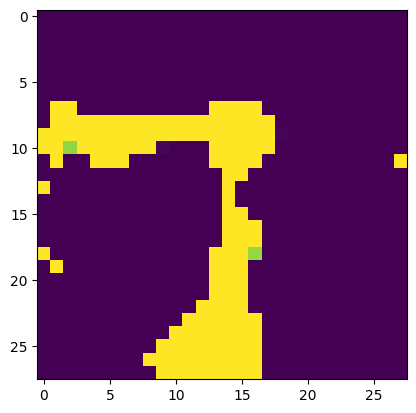

loss at end of epoch 235: 16423.224609375
test loss at end of epoch 235: 15510.373046875
RECONSTRUCTED


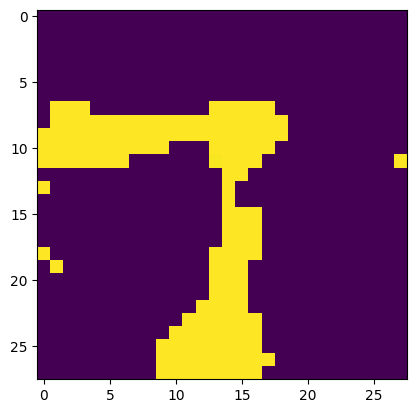

loss at end of epoch 236: 15545.3759765625
test loss at end of epoch 236: 14928.9638671875
RECONSTRUCTED


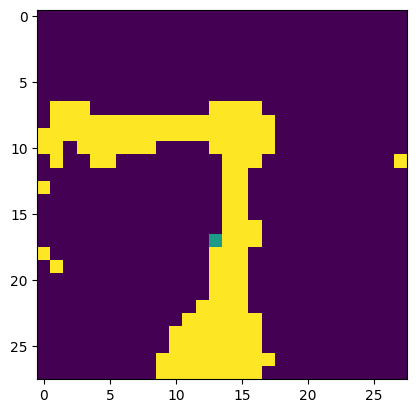

loss at end of epoch 237: 15302.5908203125
test loss at end of epoch 237: 14666.19140625
RECONSTRUCTED


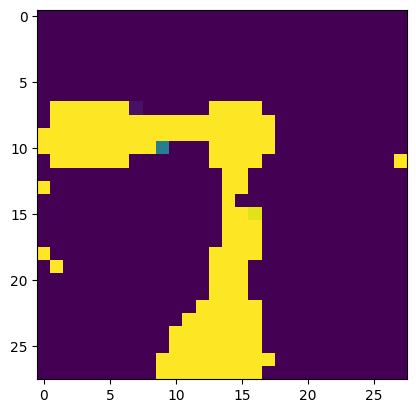

loss at end of epoch 238: 15147.171875
test loss at end of epoch 238: 14245.271484375
RECONSTRUCTED


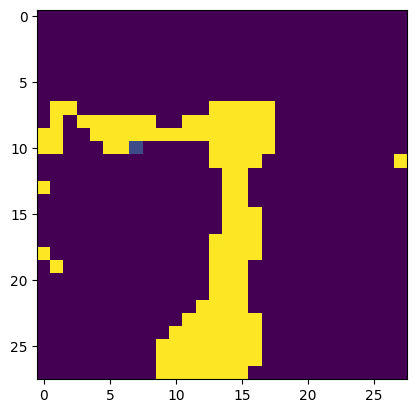

loss at end of epoch 239: 16063.271484375
test loss at end of epoch 239: 14364.052734375
RECONSTRUCTED


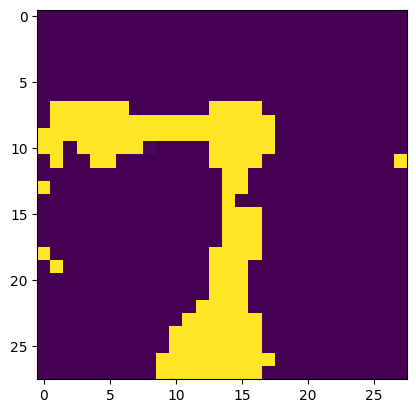

loss at end of epoch 240: 14750.25
test loss at end of epoch 240: 14986.0146484375
RECONSTRUCTED


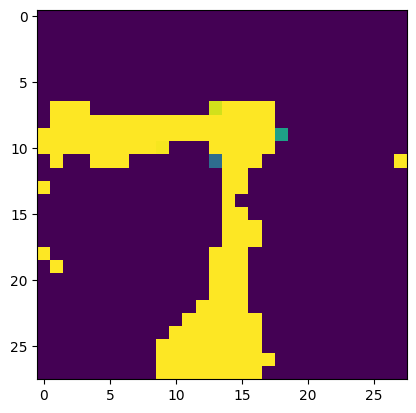

loss at end of epoch 241: 14776.2216796875
test loss at end of epoch 241: 15613.6005859375
RECONSTRUCTED


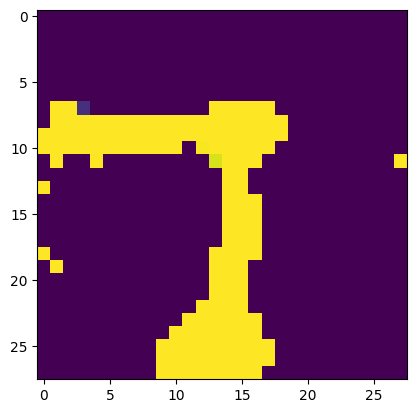

loss at end of epoch 242: 15187.8251953125
test loss at end of epoch 242: 15286.8388671875
RECONSTRUCTED


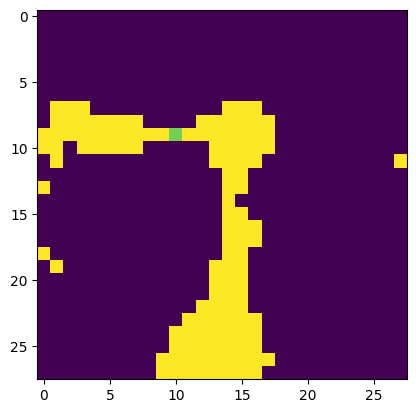

loss at end of epoch 243: 15064.55859375
test loss at end of epoch 243: 15312.59765625
RECONSTRUCTED


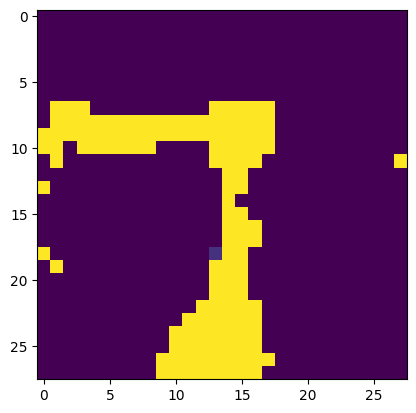

loss at end of epoch 244: 15155.78515625
test loss at end of epoch 244: 14473.958984375
RECONSTRUCTED


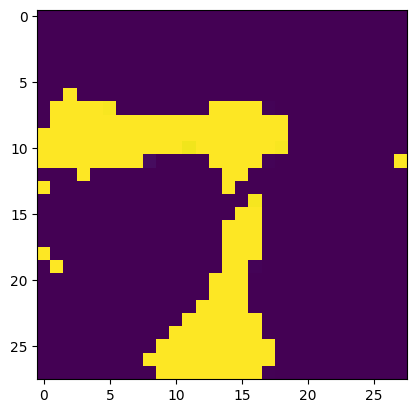

loss at end of epoch 245: 15317.501953125
test loss at end of epoch 245: 14608.15234375
RECONSTRUCTED


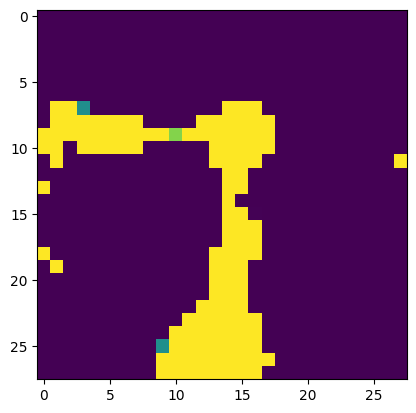

loss at end of epoch 246: 15505.041015625
test loss at end of epoch 246: 15150.7177734375
RECONSTRUCTED


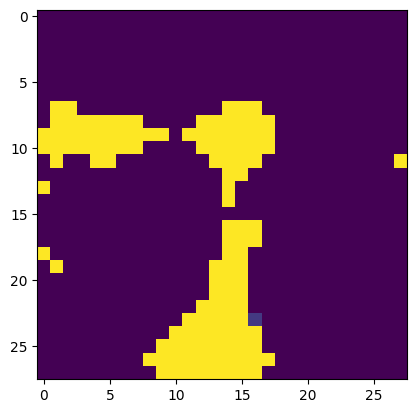

loss at end of epoch 247: 14849.65625
test loss at end of epoch 247: 14701.4921875
RECONSTRUCTED


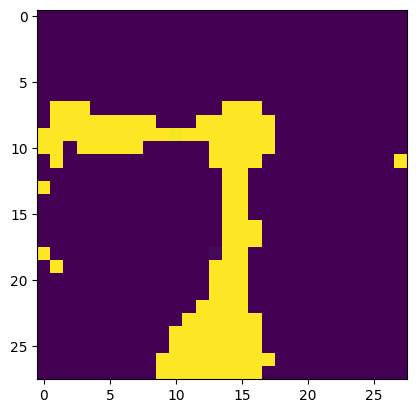

loss at end of epoch 248: 14783.1220703125
test loss at end of epoch 248: 15557.1796875
RECONSTRUCTED


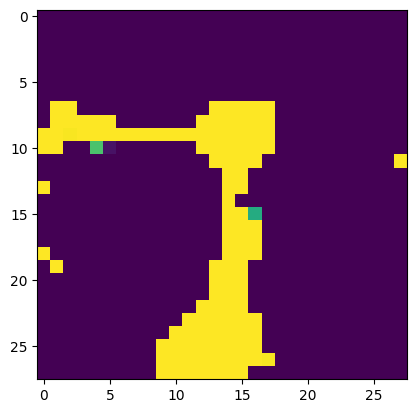

loss at end of epoch 249: 14803.39453125
test loss at end of epoch 249: 15202.30078125
RECONSTRUCTED


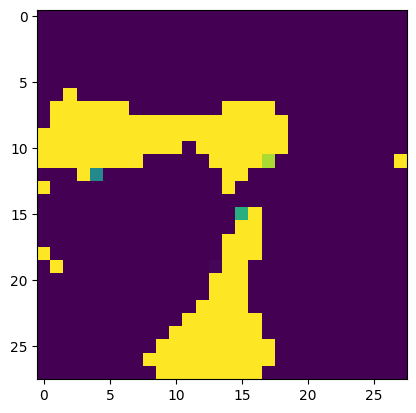

loss at end of epoch 250: 14493.9990234375
test loss at end of epoch 250: 14758.8447265625
RECONSTRUCTED


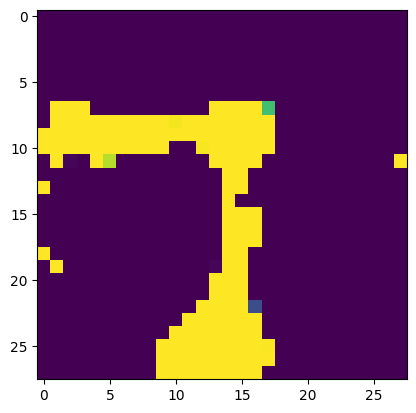

loss at end of epoch 251: 15232.8076171875
test loss at end of epoch 251: 14928.06640625
RECONSTRUCTED


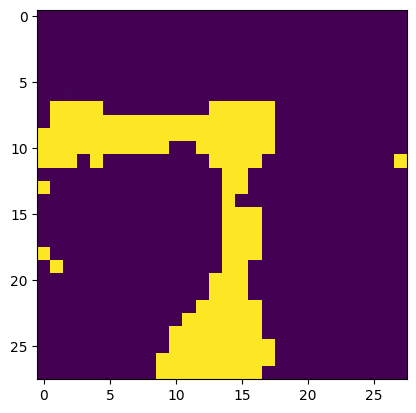

loss at end of epoch 252: 14694.1240234375
test loss at end of epoch 252: 14828.2529296875
RECONSTRUCTED


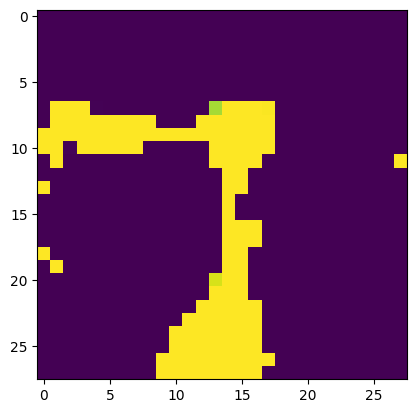

loss at end of epoch 253: 14877.400390625
test loss at end of epoch 253: 14482.2509765625
RECONSTRUCTED


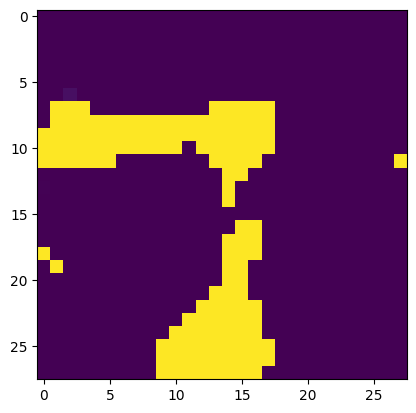

loss at end of epoch 254: 14761.3212890625
test loss at end of epoch 254: 14583.4697265625
RECONSTRUCTED


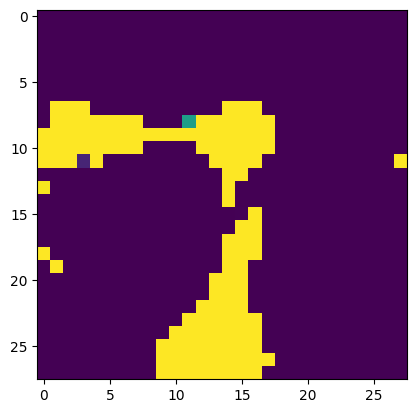

loss at end of epoch 255: 14354.708984375
test loss at end of epoch 255: 15168.7705078125
RECONSTRUCTED


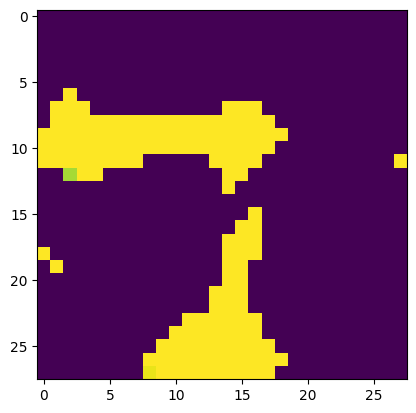

loss at end of epoch 256: 14936.619140625
test loss at end of epoch 256: 15191.28125
RECONSTRUCTED


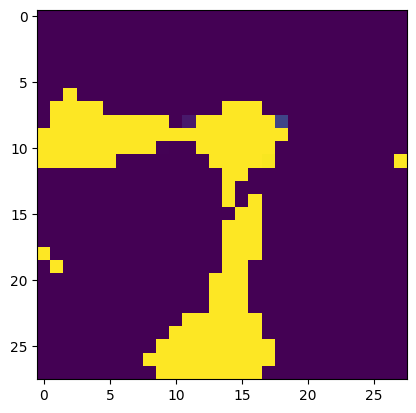

loss at end of epoch 257: 14670.4990234375
test loss at end of epoch 257: 14858.65625
RECONSTRUCTED


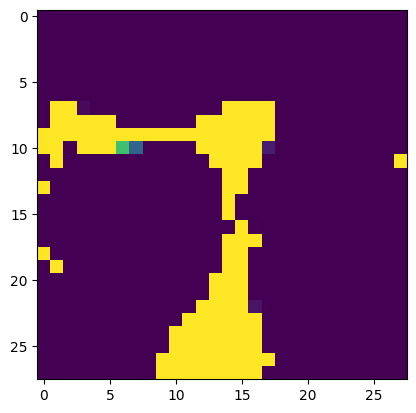

loss at end of epoch 258: 15404.046875
test loss at end of epoch 258: 14626.69921875
RECONSTRUCTED


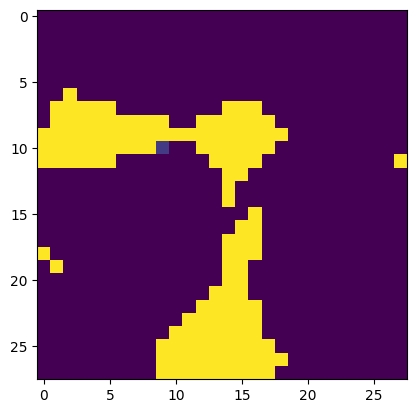

loss at end of epoch 259: 14643.5205078125
test loss at end of epoch 259: 15248.080078125
RECONSTRUCTED


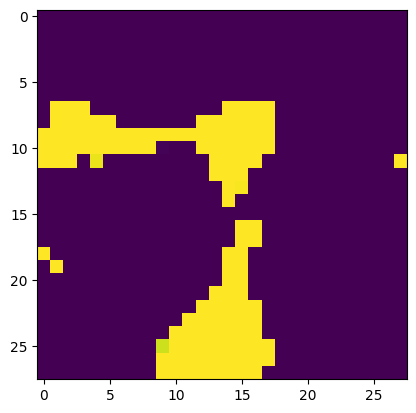

loss at end of epoch 260: 14958.50390625
test loss at end of epoch 260: 14568.5234375
RECONSTRUCTED


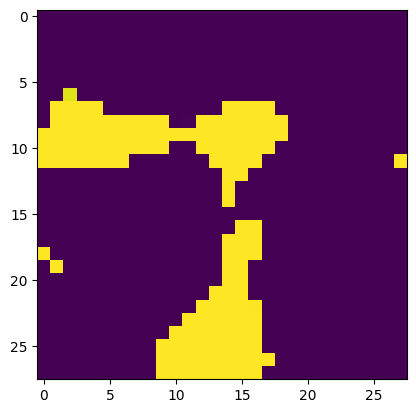

loss at end of epoch 261: 15189.6787109375
test loss at end of epoch 261: 14734.986328125
RECONSTRUCTED


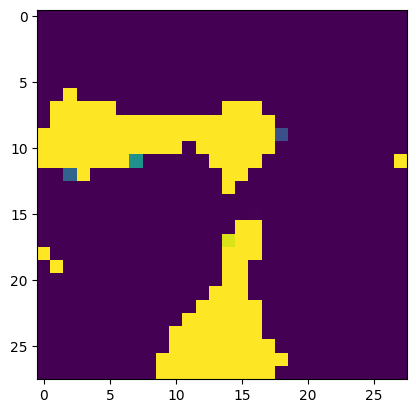

loss at end of epoch 262: 13925.9970703125
test loss at end of epoch 262: 14997.560546875
RECONSTRUCTED


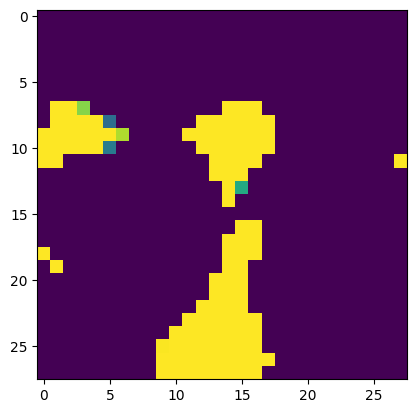

loss at end of epoch 263: 15136.740234375
test loss at end of epoch 263: 14058.4736328125
RECONSTRUCTED


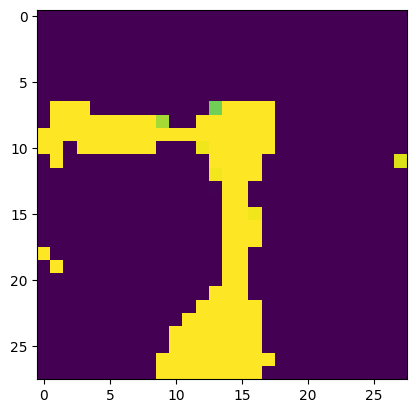

loss at end of epoch 264: 14702.1240234375
test loss at end of epoch 264: 14801.9931640625
RECONSTRUCTED


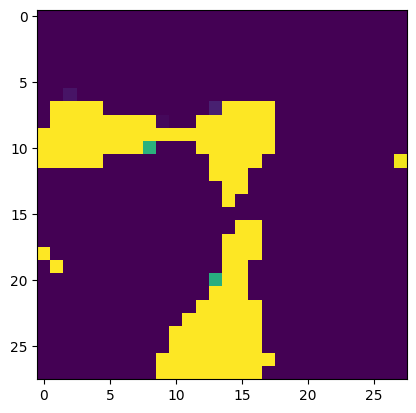

loss at end of epoch 265: 14350.6171875
test loss at end of epoch 265: 14531.3115234375
RECONSTRUCTED


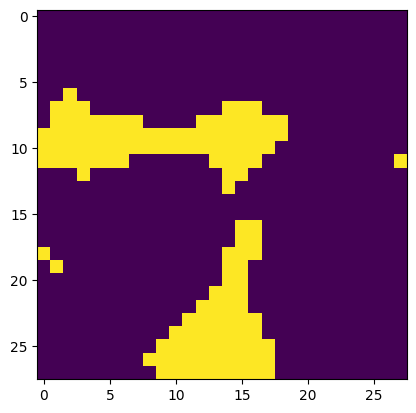

loss at end of epoch 266: 14230.869140625
test loss at end of epoch 266: 14542.7119140625
RECONSTRUCTED


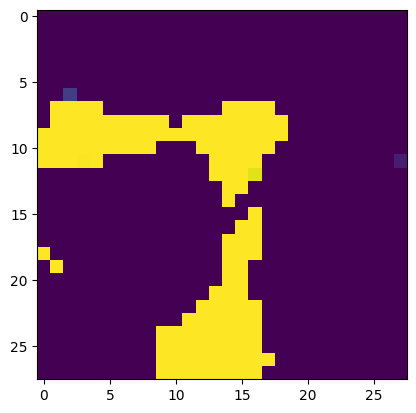

loss at end of epoch 267: 15541.4287109375
test loss at end of epoch 267: 15142.9677734375
RECONSTRUCTED


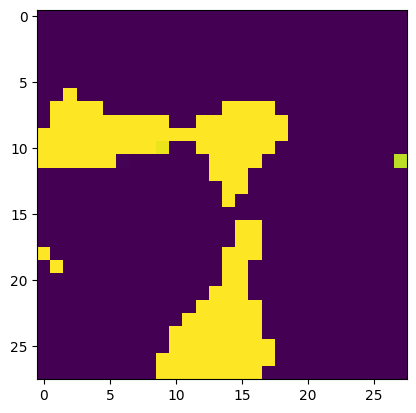

loss at end of epoch 268: 15251.98828125
test loss at end of epoch 268: 14751.013671875
RECONSTRUCTED


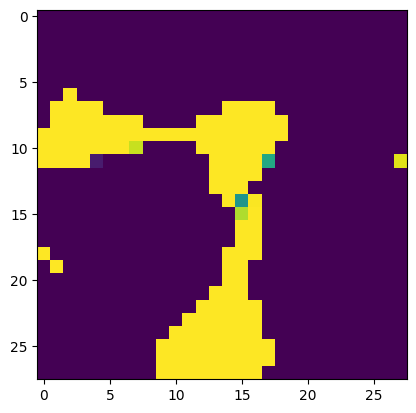

loss at end of epoch 269: 15012.5888671875
test loss at end of epoch 269: 15490.1953125
RECONSTRUCTED


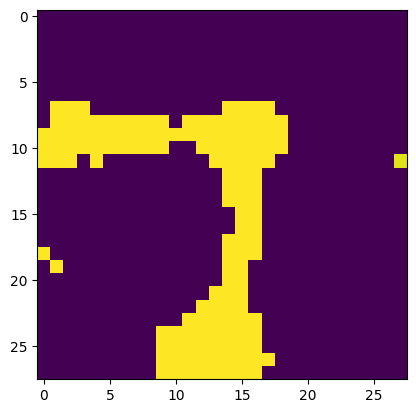

loss at end of epoch 270: 15160.91796875
test loss at end of epoch 270: 14299.568359375
RECONSTRUCTED


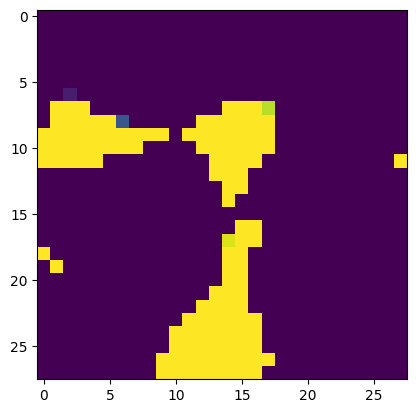

loss at end of epoch 271: 14521.0791015625
test loss at end of epoch 271: 14931.5732421875
RECONSTRUCTED


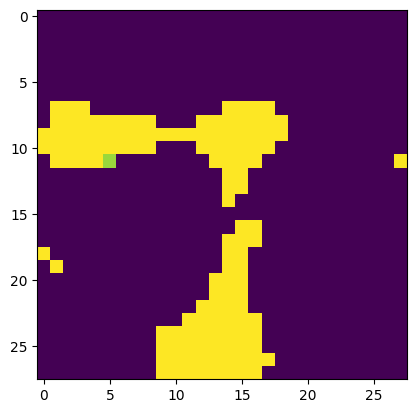

loss at end of epoch 272: 14551.416015625
test loss at end of epoch 272: 15080.224609375
RECONSTRUCTED


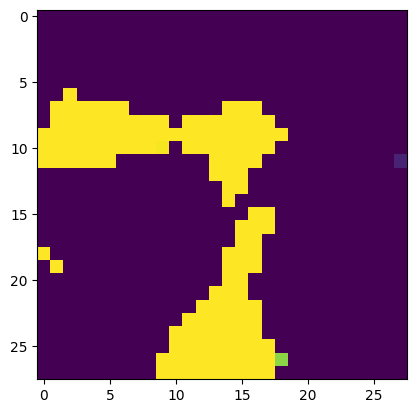

loss at end of epoch 273: 15239.1181640625
test loss at end of epoch 273: 14608.7783203125
RECONSTRUCTED


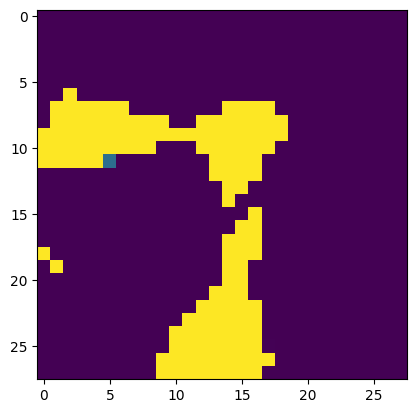

loss at end of epoch 274: 14463.263671875
test loss at end of epoch 274: 14507.2802734375
RECONSTRUCTED


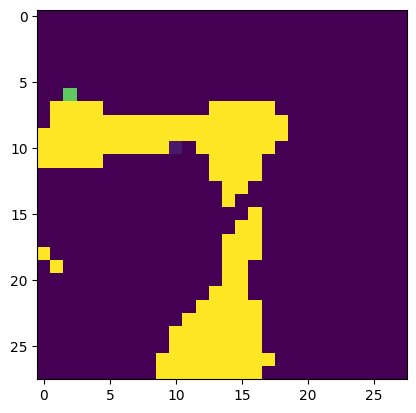

loss at end of epoch 275: 14317.4404296875
test loss at end of epoch 275: 14991.1904296875
RECONSTRUCTED


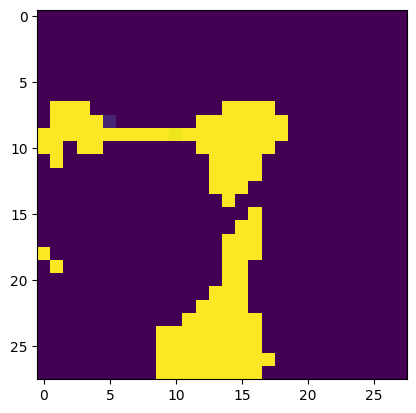

loss at end of epoch 276: 14612.494140625
test loss at end of epoch 276: 14716.36328125
RECONSTRUCTED


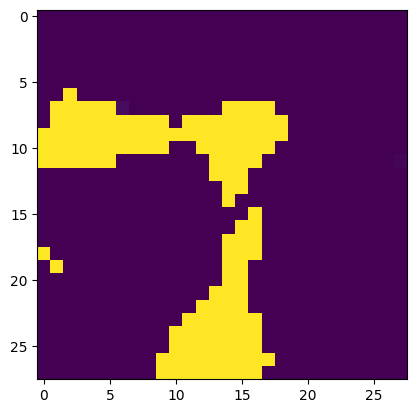

loss at end of epoch 277: 13948.375
test loss at end of epoch 277: 14870.70703125
RECONSTRUCTED


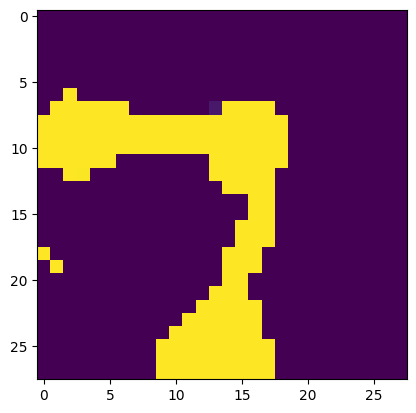

loss at end of epoch 278: 13759.78125
test loss at end of epoch 278: 14873.83203125
RECONSTRUCTED


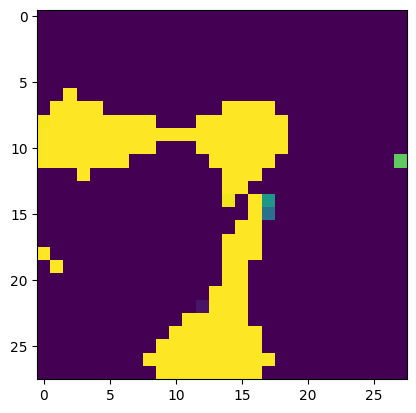

loss at end of epoch 279: 14511.0888671875
test loss at end of epoch 279: 14575.3369140625
RECONSTRUCTED


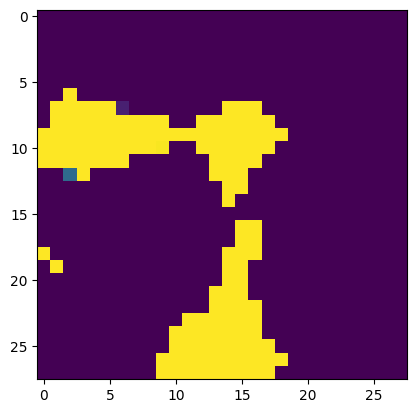

loss at end of epoch 280: 14025.7529296875
test loss at end of epoch 280: 14440.2685546875
RECONSTRUCTED


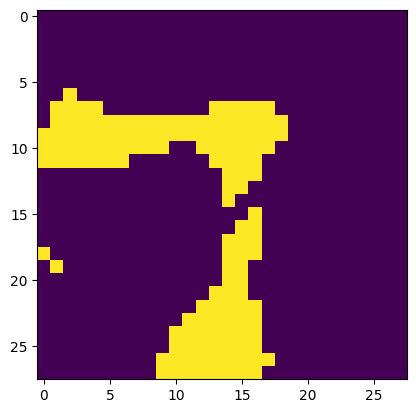

loss at end of epoch 281: 13815.46484375
test loss at end of epoch 281: 14693.2197265625
RECONSTRUCTED


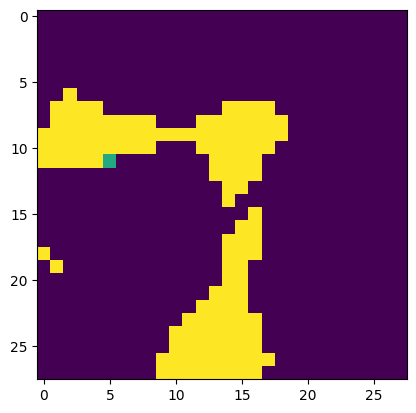

loss at end of epoch 282: 14325.146484375
test loss at end of epoch 282: 14448.205078125
RECONSTRUCTED


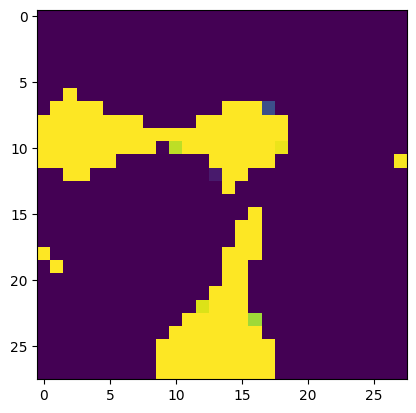

loss at end of epoch 283: 14500.265625
test loss at end of epoch 283: 14778.8935546875
RECONSTRUCTED


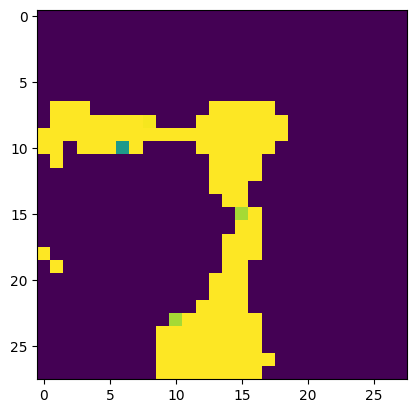

loss at end of epoch 284: 14720.8330078125
test loss at end of epoch 284: 13865.880859375
RECONSTRUCTED


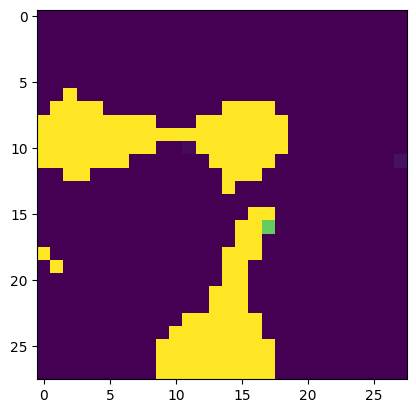

loss at end of epoch 285: 14522.2880859375
test loss at end of epoch 285: 14425.7744140625
RECONSTRUCTED


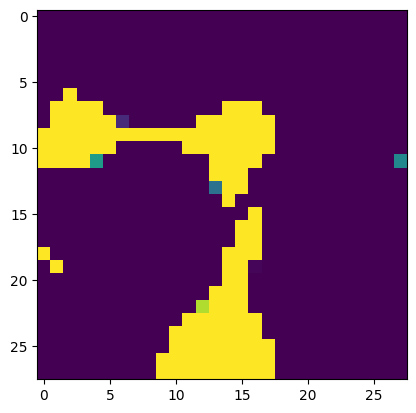

loss at end of epoch 286: 14100.09375
test loss at end of epoch 286: 14563.275390625
RECONSTRUCTED


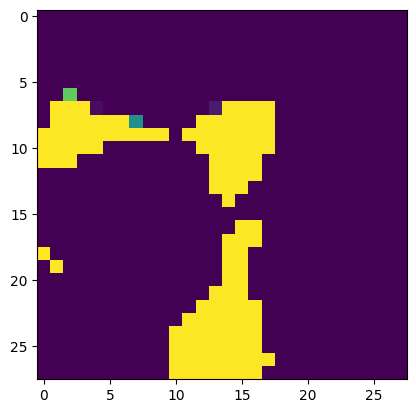

loss at end of epoch 287: 14793.91796875
test loss at end of epoch 287: 14401.8818359375
RECONSTRUCTED


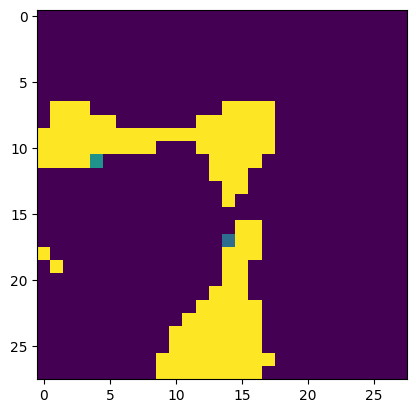

loss at end of epoch 288: 14876.9033203125
test loss at end of epoch 288: 14672.08984375
RECONSTRUCTED


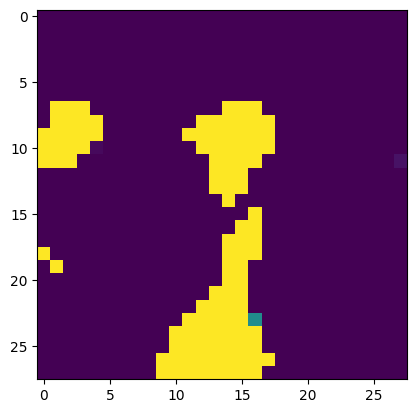

loss at end of epoch 289: 15074.32421875
test loss at end of epoch 289: 13735.80859375
RECONSTRUCTED


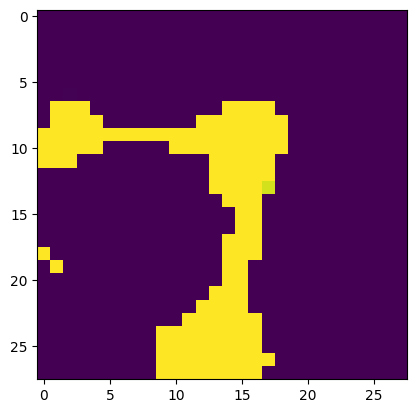

loss at end of epoch 290: 14206.32421875
test loss at end of epoch 290: 14954.3349609375
RECONSTRUCTED


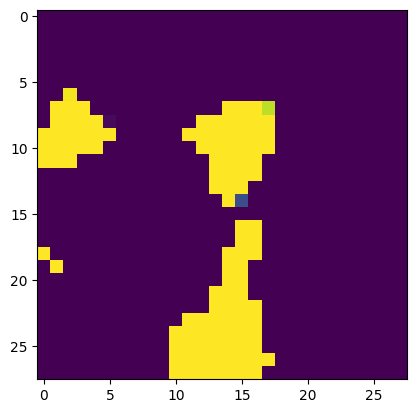

loss at end of epoch 291: 14555.3134765625
test loss at end of epoch 291: 14508.869140625
RECONSTRUCTED


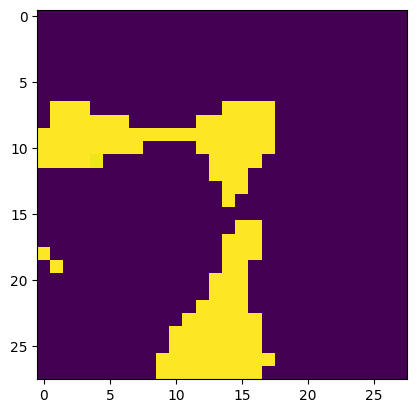

loss at end of epoch 292: 14890.271484375
test loss at end of epoch 292: 14639.19921875
RECONSTRUCTED


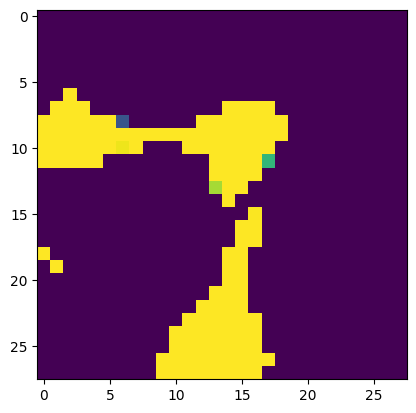

loss at end of epoch 293: 15062.548828125
test loss at end of epoch 293: 14102.20703125
RECONSTRUCTED


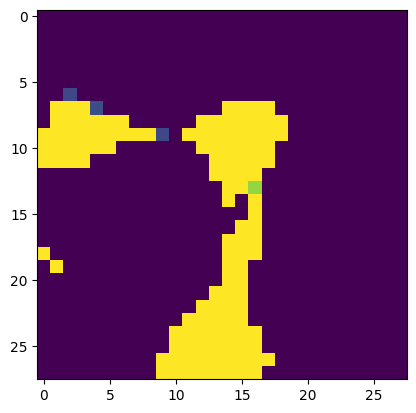

loss at end of epoch 294: 14698.68359375
test loss at end of epoch 294: 14861.74609375
RECONSTRUCTED


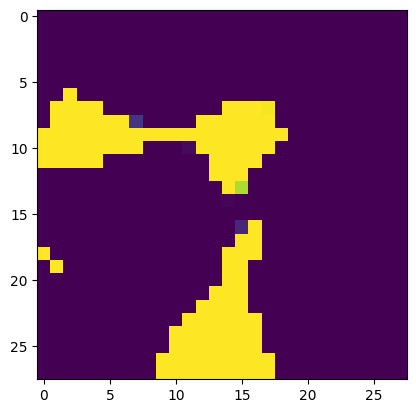

loss at end of epoch 295: 13901.6904296875
test loss at end of epoch 295: 14343.5322265625
RECONSTRUCTED


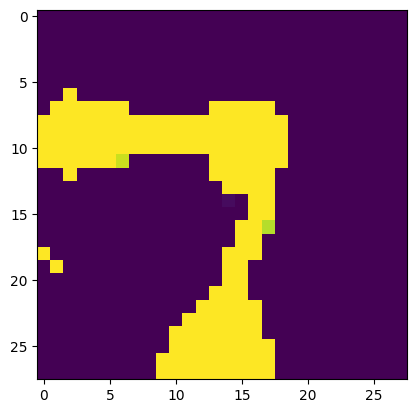

loss at end of epoch 296: 14538.7451171875
test loss at end of epoch 296: 14854.9990234375
RECONSTRUCTED


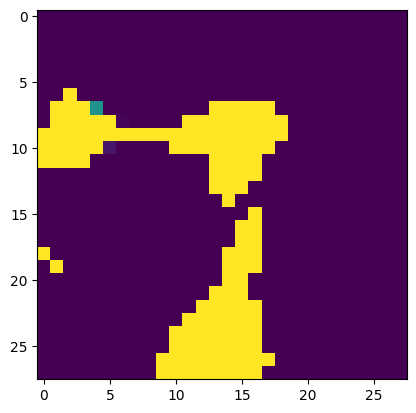

loss at end of epoch 297: 15011.1943359375
test loss at end of epoch 297: 15070.2880859375
RECONSTRUCTED


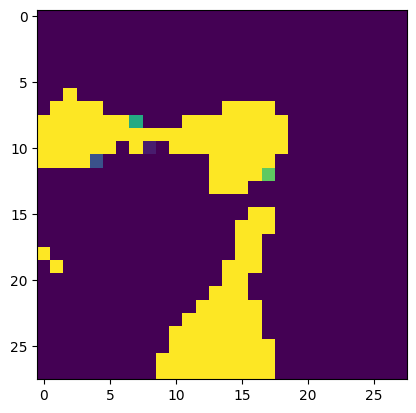

loss at end of epoch 298: 14161.62890625
test loss at end of epoch 298: 13903.283203125
RECONSTRUCTED


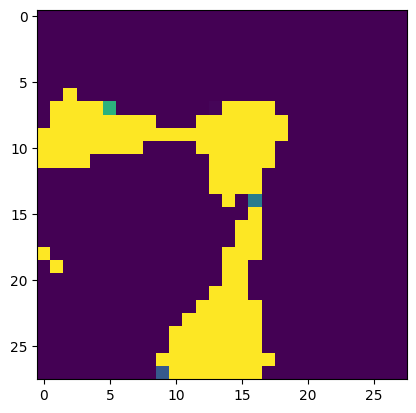

loss at end of epoch 299: 14540.6416015625
test loss at end of epoch 299: 13843.21875
RECONSTRUCTED


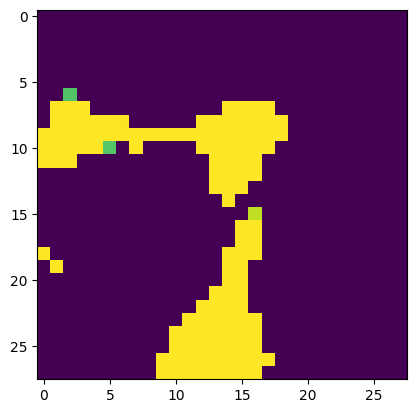

In [33]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transforms.ToTensor()),
                                           batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
                                          batch_size=100, shuffle=True)
cuda = torch.cuda.is_available()

device = torch.device("cuda" if cuda else "cpu")

latent_dim = 50

model = DirVAE(latent_dim).to(device)

params = model.parameters()
optimizer = optim.Adam(params, lr=5e-4)

alpha =  ((1 - 1/latent_dim) * torch.ones(size=(latent_dim,))).to(device)

epochs = 300

scaler = GradScaler()

for epoch in range(epochs):
    model.train()
    for batch_idx, (x, _) in enumerate(train_loader): 
        x = x.to(device)
        optimizer.zero_grad()
        with autocast():
            x_hat, alpha_hat = model(x)
            loss = ELBO(x_hat, x, alpha_hat, alpha)
        scaler.scale(loss).backward()
        torch.nn.utils.clip_grad_norm_(params, 1.0)
        scaler.step(optimizer)
        scaler.update()
    print(f'loss at end of epoch {epoch}: {loss.item()}')
    
    model.eval()
    with torch.no_grad():
        for i, (val_x, _) in enumerate(test_loader):
            val_x = val_x.to(device)
            val_x_hat, val_alpha_hat = model(val_x)
            test_loss = ELBO(val_x_hat, val_x, val_alpha_hat, alpha)
    print(f'test loss at end of epoch {epoch}: {test_loss.item()}')
    
    if epoch == 0:
        print('ORIGINAL')
        plt.imshow(test_loader.dataset[0][0].numpy().reshape(28,28))
        plt.show()
    with torch.no_grad():
        sample = test_loader.dataset[0][0].to(device)
        img, img_alpha_hat = model(sample)
    img = torch.sigmoid(img)
    img = img.to('cpu').numpy().reshape(28,28)
    print('RECONSTRUCTED')
    plt.imshow(img)
    plt.show()